In [2]:
import pandas as pd
import yfinance as yf

## List of S&P 500 Companies

In [4]:
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)
data_table

[    Symbol             Security             GICS Sector  \
 0      MMM                   3M             Industrials   
 1      AOS          A. O. Smith             Industrials   
 2      ABT  Abbott Laboratories             Health Care   
 3     ABBV               AbbVie             Health Care   
 4      ACN            Accenture  Information Technology   
 ..     ...                  ...                     ...   
 498    XYL           Xylem Inc.             Industrials   
 499    YUM          Yum! Brands  Consumer Discretionary   
 500   ZBRA   Zebra Technologies  Information Technology   
 501    ZBH        Zimmer Biomet             Health Care   
 502    ZTS               Zoetis             Health Care   
 
                                 GICS Sub-Industry    Headquarters Location  \
 0                        Industrial Conglomerates    Saint Paul, Minnesota   
 1                               Building Products     Milwaukee, Wisconsin   
 2                           Health Care 

In [5]:
sp500_df = data_table[0]
sp500_df

Symbol             Security             GICS Sector  \
0      MMM                   3M             Industrials   
1      AOS          A. O. Smith             Industrials   
2      ABT  Abbott Laboratories             Health Care   
3     ABBV               AbbVie             Health Care   
4      ACN            Accenture  Information Technology   
..     ...                  ...                     ...   
498    XYL           Xylem Inc.             Industrials   
499    YUM          Yum! Brands  Consumer Discretionary   
500   ZBRA   Zebra Technologies  Information Technology   
501    ZBH        Zimmer Biomet             Health Care   
502    ZTS               Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipment  North Chicago, Illinois   
3                                   Biotechnology  North Chicago, Illinois   
4                  IT Consulting & Other Services          Dublin, Ireland   
..                                            ...                      ...   
498  Industrial Machinery & Supplies & Components   White Plains, New York   
499                                   Restaurants     Louisville, Kentucky   
500            Electronic Equipment & Instruments   Lincolnshire, Illinois   
501                         Health Care Equipment          Warsaw, Indiana   
502                               Pharmaceuticals   Parsippany, New Jersey   

     Date added      CIK      Founded  
0    1957-03-04    66740         1902  
1    2017-07-26    91142         1916  
2    1957-03-04     1800         1888  
3    2012-12-31  1551152  2013 (1888)  
4    2011-07-06  1467373         1989  
..          ...      ...          ...  
498  2011-11-01  1524472         2011  
499  1997-10-06  1041061         1997  
500  2019-12-23   877212         1969  
501  2001-08-07  1136869         1927  
502  2013-06-21  1555280         1952  

[503 rows x 8 columns]

In [6]:
tesla = sp500_df[sp500_df['Symbol'] == 'TSLA']
tesla

Symbol     Security             GICS Sector         GICS Sub-Industry  \
440   TSLA  Tesla, Inc.  Consumer Discretionary  Automobile Manufacturers   

    Headquarters Location  Date added      CIK Founded  
440         Austin, Texas  2020-12-21  1318605    2003

In [7]:
tickers = data_table[0]['Symbol'].tolist()
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',

In [8]:
len(tickers)

503

## Historical Stock Prices for S&P 500 Companies

In [10]:
from datetime import datetime, timedelta

# Get today's date
today = datetime.today()

# Calculate the date one year ago from today
one_year_ago = today - timedelta(days=365)

# Convert the dates to string format (YYYY-MM-DD)
start_date = one_year_ago.strftime('%Y-%m-%d')
end_date = today.strftime('%Y-%m-%d')


# Download stock data for the last 1 year (today to one year ago)
snp_prices_close = yf.download(tickers, start=start_date, end=end_date)['Close']

# Display Tesla's closing prices
snp_prices_close

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-25 -> 2025-06-25)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


Ticker               A        AAPL        ABBV        ABNB         ABT  \
Date                                                                     
2024-06-25  133.695145  208.096802  164.764511  150.910004  103.416817   
2024-06-26  132.106949  212.257339  165.150482  150.000000  102.818802   
2024-06-27  129.833862  213.103409  163.066223  151.610001  102.593330   
2024-06-28  128.672516  209.639557  165.507523  151.630005  101.867882   
2024-07-01  126.458977  215.741043  164.397842  151.630005  101.171822   
...                ...         ...         ...         ...         ...   
2025-06-17  116.089996  195.639999  185.479996  133.369995  132.279999   
2025-06-18  115.519997  196.580002  185.490005  132.169998  132.410004   
2025-06-20  115.559998  201.000000  185.300003  131.729996  132.990005   
2025-06-23  116.129997  201.500000  183.759995  130.529999  133.259995   
2025-06-24  117.639999  200.300003  185.550003  132.149994  138.080002   

Ticker           ACGL         ACN        ADBE         ADI        ADM  ...  \
Date                                                                  ...   
2024-06-25  97.134285  301.803467  526.880005  226.449478  58.316212  ...   
2024-06-26  94.871140  299.297974  528.659973  223.991714  58.335438  ...   
2024-06-27  96.059769  297.892975  546.760010  222.851303  58.277748  ...   
2024-06-28  95.936150  298.109131  555.539978  224.404617  58.123905  ...   
2024-07-01  95.707939  297.264160  560.010010  221.376633  58.306591  ...   
...               ...         ...         ...         ...        ...  ...   
2025-06-17  90.150002  312.029999  382.679993  227.440002  54.099998  ...   
2025-06-18  90.300003  306.380005  378.040009  229.649994  53.990002  ...   
2025-06-20  90.169998  285.369995  376.920013  228.350006  53.610001  ...   
2025-06-23  91.110001  295.000000  380.119995  230.979996  52.820000  ...   
2025-06-24  90.970001  300.720001  382.339996  234.979996  52.930000  ...   

Ticker             WTW         WY       WYNN        XEL         XOM  \
Date                                                                  
2024-06-25  259.960144  27.503180  87.308975  51.970200  110.516373   
2024-06-26  260.533264  27.191967  87.140877  52.018551  110.555031   
2024-06-27  260.908752  27.444826  88.139542  52.076572  111.028511   
2024-06-28  259.907349  27.610157  88.495506  51.651062  111.241104   
2024-07-01  257.210541  26.802956  86.686035  50.703339  111.086494   
...                ...        ...        ...        ...         ...   
2025-06-17  297.790009  25.870001  87.279999  65.650002  114.000000   
2025-06-18  297.500000  25.969999  86.910004  66.279999  113.190002   
2025-06-20  299.000000  26.180000  88.489998  66.639999  114.699997   
2025-06-23  303.690002  26.580000  89.699997  67.910004  111.739998   
2025-06-24  302.380005  26.650000  90.970001  68.230003  108.339996   

Ticker             XYL         YUM         ZBH        ZBRA         ZTS  
Date                                                                    
2024-06-25  135.332504  129.785110  107.268753  306.040009  166.120728  
2024-06-26  134.620941  129.422226  107.397903  307.119995  169.008423  
2024-06-27  134.798828  130.059738  107.666115  306.989990  174.506897  
2024-06-28  134.047714  129.912628  107.815125  308.929993  171.441193  
2024-07-01  129.995514  127.205681  105.262062  306.209991  170.669830  
...                ...         ...         ...         ...         ...  
2025-06-17  125.370003  139.990005   90.209999  289.359985  161.669998  
2025-06-18  125.129997  138.360001   90.550003  291.730011  155.059998  
2025-06-20  124.459999  139.059998   91.220001  294.040009  157.169998  
2025-06-23  125.489998  141.389999   91.500000  296.250000  157.339996  
2025-06-24  127.150002  142.699997   92.339996  298.940002  157.770004  

[250 rows x 503 columns]

In [11]:
tesla_close = snp_prices_close['TSLA']
tesla_close

Date
2024-06-25    187.350006
2024-06-26    196.369995
2024-06-27    197.419998
2024-06-28    197.880005
2024-07-01    209.860001
                 ...    
2025-06-17    316.350006
2025-06-18    322.049988
2025-06-20    322.160004
2025-06-23    348.679993
2025-06-24    340.470001
Name: TSLA, Length: 250, dtype: float64

In [12]:
yf.download('BRK.B')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


Empty DataFrame
Columns: [(Adj Close, BRK.B), (Close, BRK.B), (High, BRK.B), (Low, BRK.B), (Open, BRK.B), (Volume, BRK.B)]
Index: []

In [13]:
yf.download('BF.B')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 1926-07-20 -> 2025-06-25)')


Empty DataFrame
Columns: [(Adj Close, BF.B), (Close, BF.B), (High, BF.B), (Low, BF.B), (Open, BF.B), (Volume, BF.B)]
Index: []

In [14]:
'BRK-B' in tickers

False

In [15]:
for i in range(len(tickers)):
    if tickers[i] == 'BRK.B':
        tickers[i] = 'BRK-B'
    elif tickers[i] == 'BF.B':
        tickers[i] = 'BF-B'

In [16]:
'BRK-B' in tickers

True

In [17]:
import yfinance as yf
from datetime import datetime, timedelta

# Get today's date
today = datetime.today()

# Calculate the date one year ago from today
one_year_ago = today - timedelta(days=365)

# Convert the dates to string format (YYYY-MM-DD)
start_date = one_year_ago.strftime('%Y-%m-%d')
end_date = today.strftime('%Y-%m-%d')


# Download stock data for the last 1 year (today to one year ago)
snp_prices_close = yf.download(tickers, start=start_date, end=end_date)['Close']

# Display Tesla's closing prices
snp_prices_close

[*********************100%***********************]  503 of 503 completed


Ticker               A        AAPL        ABBV        ABNB         ABT  \
Date                                                                     
2024-06-25  133.695129  208.096817  164.764511  150.910004  103.416817   
2024-06-26  132.106949  212.257339  165.150482  150.000000  102.818810   
2024-06-27  129.833878  213.103394  163.066223  151.610001  102.593323   
2024-06-28  128.672516  209.639572  165.507523  151.630005  101.867874   
2024-07-01  126.458984  215.741043  164.397842  151.630005  101.171822   
...                ...         ...         ...         ...         ...   
2025-06-17  116.089996  195.639999  185.479996  133.369995  132.279999   
2025-06-18  115.519997  196.580002  185.490005  132.169998  132.410004   
2025-06-20  115.559998  201.000000  185.300003  131.729996  132.990005   
2025-06-23  116.129997  201.500000  183.759995  130.529999  133.259995   
2025-06-24  117.639999  200.300003  185.550003  132.149994  138.080002   

Ticker           ACGL         ACN        ADBE         ADI        ADM  ...  \
Date                                                                  ...   
2024-06-25  97.134285  301.803467  526.880005  226.449478  58.316208  ...   
2024-06-26  94.871140  299.298004  528.659973  223.991730  58.335438  ...   
2024-06-27  96.059769  297.892975  546.760010  222.851303  58.277748  ...   
2024-06-28  95.936150  298.109131  555.539978  224.404602  58.123901  ...   
2024-07-01  95.707939  297.264130  560.010010  221.376648  58.306591  ...   
...               ...         ...         ...         ...        ...  ...   
2025-06-17  90.150002  312.029999  382.679993  227.440002  54.099998  ...   
2025-06-18  90.300003  306.380005  378.040009  229.649994  53.990002  ...   
2025-06-20  90.169998  285.369995  376.920013  228.350006  53.610001  ...   
2025-06-23  91.110001  295.000000  380.119995  230.979996  52.820000  ...   
2025-06-24  90.970001  300.720001  382.339996  234.979996  52.930000  ...   

Ticker             WTW         WY       WYNN        XEL         XOM  \
Date                                                                  
2024-06-25  259.960114  27.503180  87.308968  51.970200  110.516373   
2024-06-26  260.533234  27.191969  87.140877  52.018551  110.555023   
2024-06-27  260.908752  27.444826  88.139542  52.076576  111.028511   
2024-06-28  259.907379  27.610157  88.495491  51.651062  111.241104   
2024-07-01  257.210541  26.802958  86.686043  50.703342  111.086494   
...                ...        ...        ...        ...         ...   
2025-06-17  297.790009  25.870001  87.279999  65.650002  114.000000   
2025-06-18  297.500000  25.969999  86.910004  66.279999  113.190002   
2025-06-20  299.000000  26.180000  88.489998  66.639999  114.699997   
2025-06-23  303.690002  26.580000  89.699997  67.910004  111.739998   
2025-06-24  302.380005  26.650000  90.970001  68.230003  108.339996   

Ticker             XYL         YUM         ZBH        ZBRA         ZTS  
Date                                                                    
2024-06-25  135.332504  129.785110  107.268753  306.040009  166.120743  
2024-06-26  134.620941  129.422241  107.397903  307.119995  169.008438  
2024-06-27  134.798813  130.059723  107.666115  306.989990  174.506897  
2024-06-28  134.047699  129.912613  107.815132  308.929993  171.441193  
2024-07-01  129.995514  127.205681  105.262062  306.209991  170.669830  
...                ...         ...         ...         ...         ...  
2025-06-17  125.370003  139.990005   90.209999  289.359985  161.669998  
2025-06-18  125.129997  138.360001   90.550003  291.730011  155.059998  
2025-06-20  124.459999  139.059998   91.220001  294.040009  157.169998  
2025-06-23  125.489998  141.389999   91.500000  296.250000  157.339996  
2025-06-24  127.150002  142.699997   92.339996  298.940002  157.770004  

[250 rows x 503 columns]

In [18]:
brkb_close = snp_prices_close['BRK-B']
brkb_close

Date
2024-06-25    410.970001
2024-06-26    410.260010
2024-06-27    407.950012
2024-06-28    406.799988
2024-07-01    405.190002
                 ...    
2025-06-17    483.480011
2025-06-18    485.140015
2025-06-20    484.850006
2025-06-23    487.769989
2025-06-24    493.480011
Name: BRK-B, Length: 250, dtype: float64

## EDA

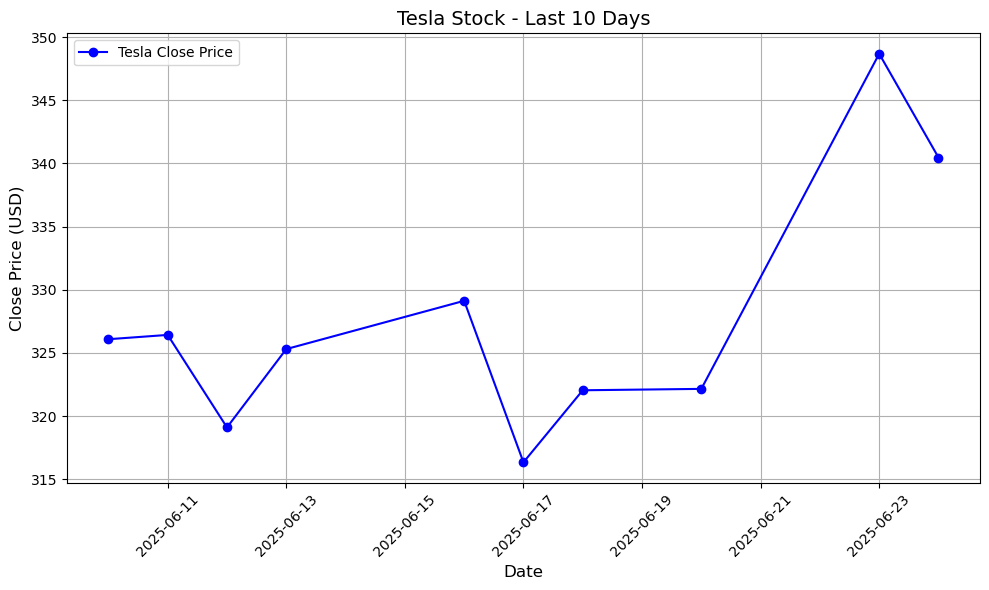

In [20]:
import matplotlib.pyplot as plt

# Get Tesla's stock data
tesla_close = snp_prices_close['TSLA']

# Get the last 10 days of Tesla's stock data
tesla_last_10_days = tesla_close.tail(10)

# Plot the last 10 days of Tesla's closing prices
plt.figure(figsize=(10, 6))
plt.plot(tesla_last_10_days.index, tesla_last_10_days.values, marker='o', color='b', label='Tesla Close Price')

plt.title('Tesla Stock - Last 10 Days', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Stocks that increased every day in the last 5 days:
Abbott Laboratories (ABT)


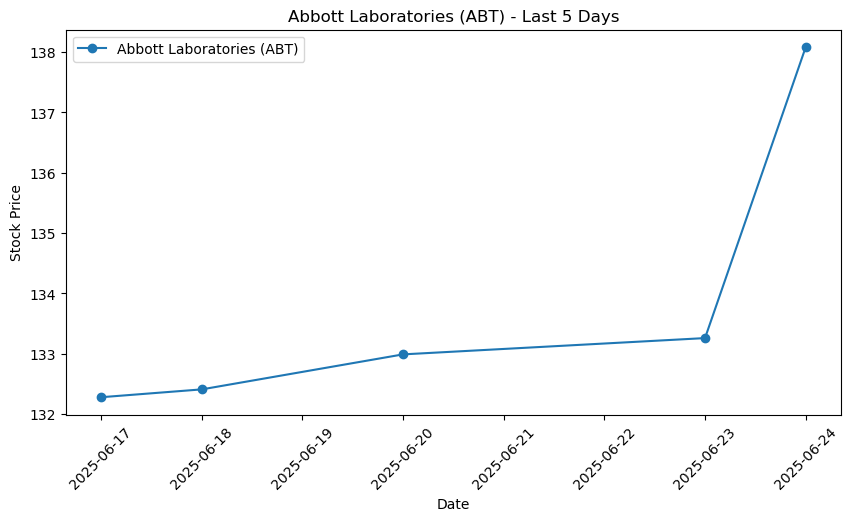

Ameren (AEE)


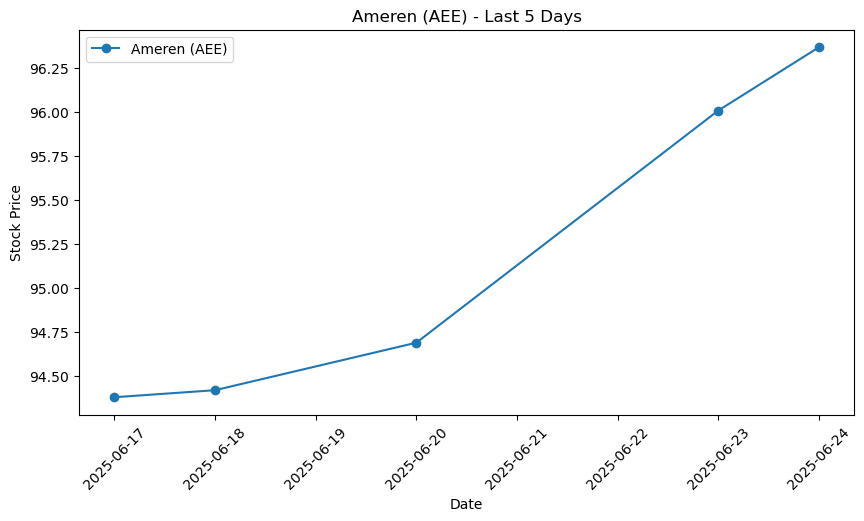

Arthur J. Gallagher & Co. (AJG)


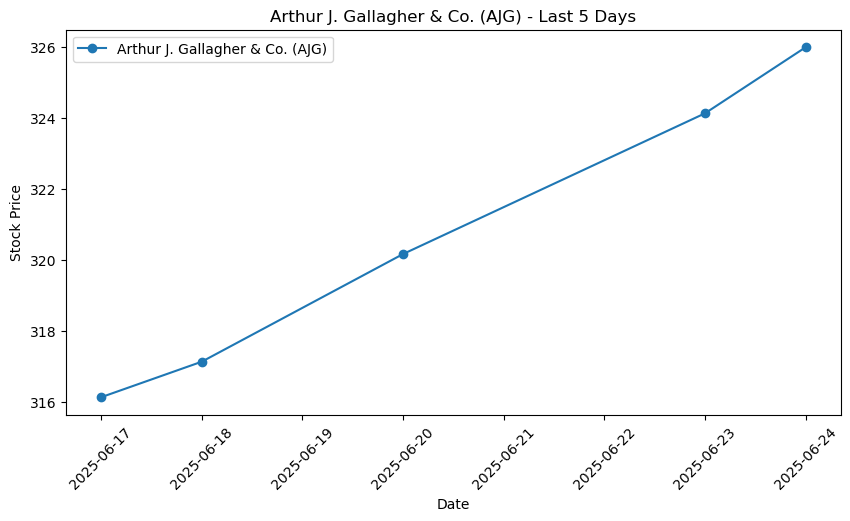

Align Technology (ALGN)


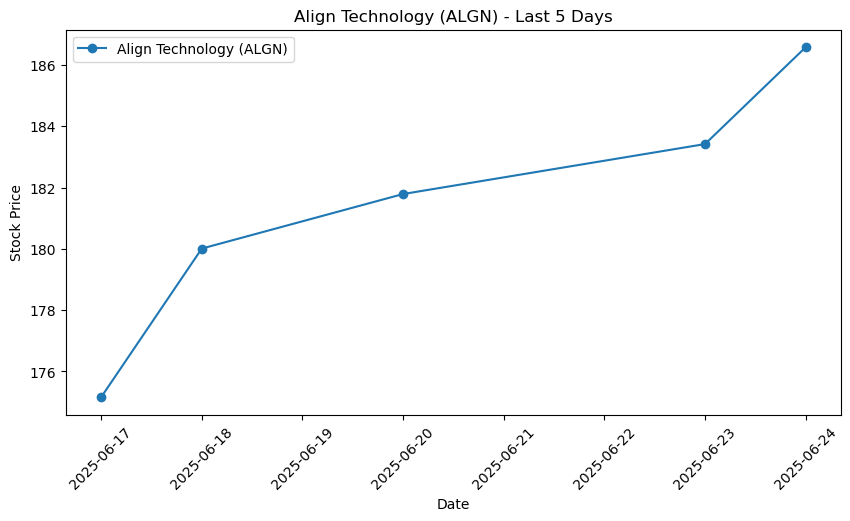

Allegion (ALLE)


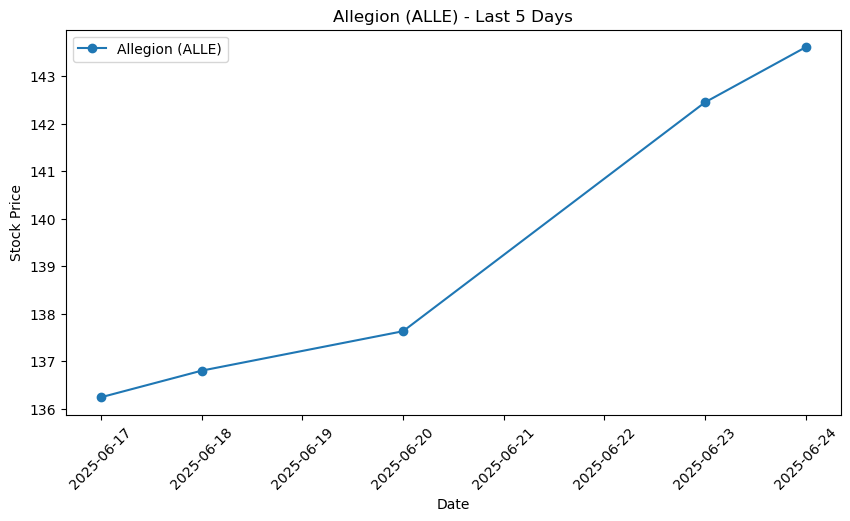

American Tower (AMT)


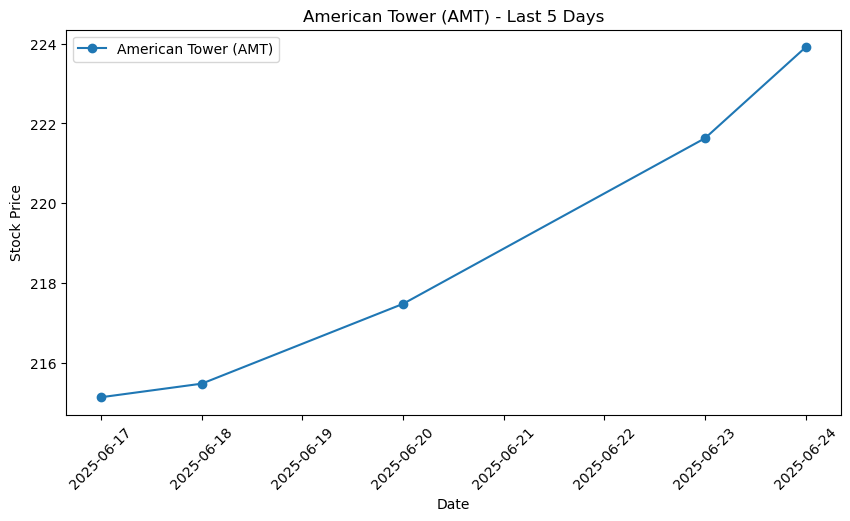

Aon plc (AON)


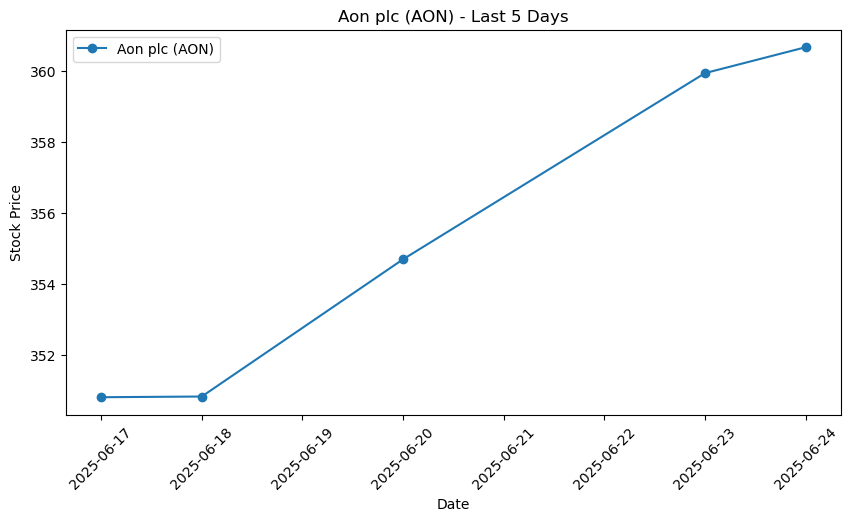

Amphenol (APH)


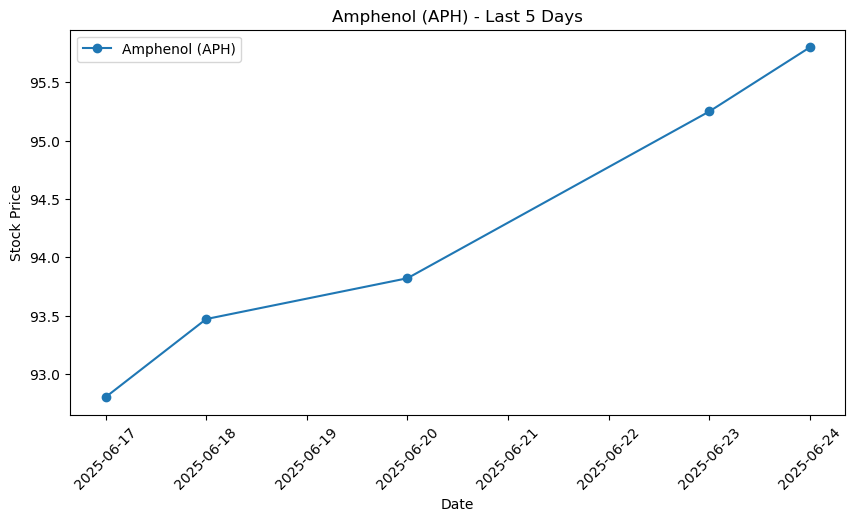

Atmos Energy (ATO)


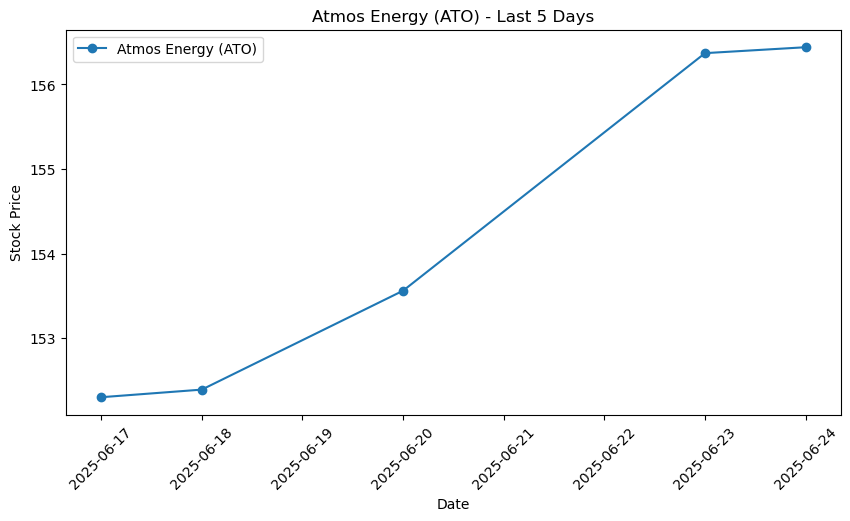

American Express (AXP)


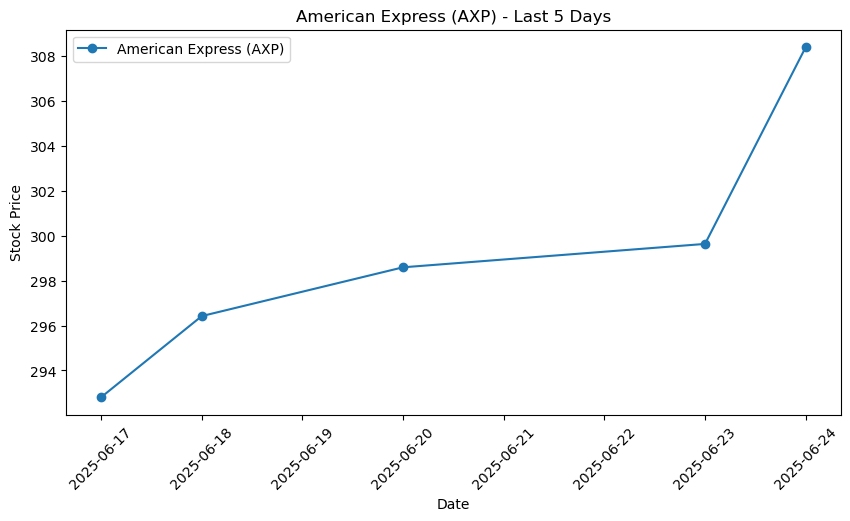

Bank of America (BAC)


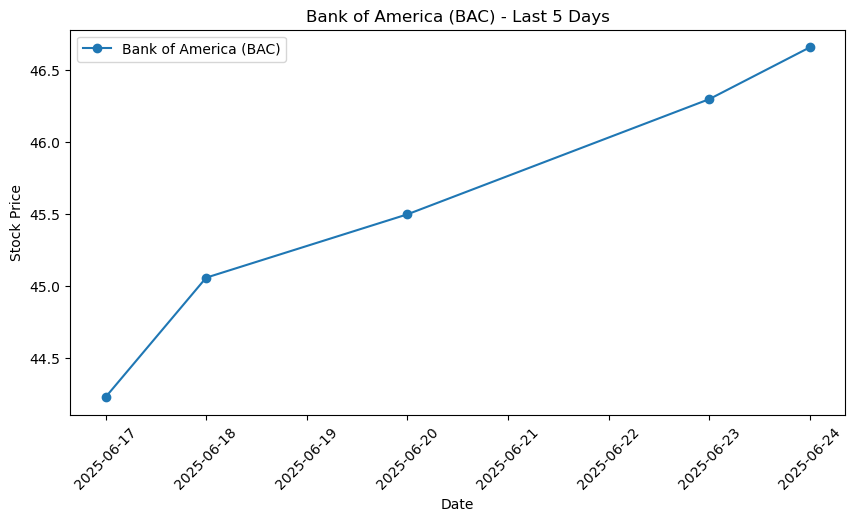

Ball Corporation (BALL)


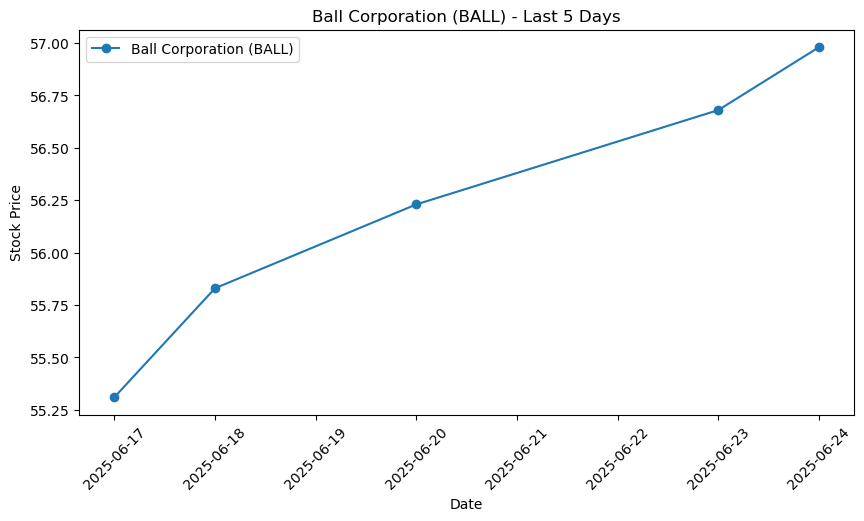

Franklin Resources (BEN)


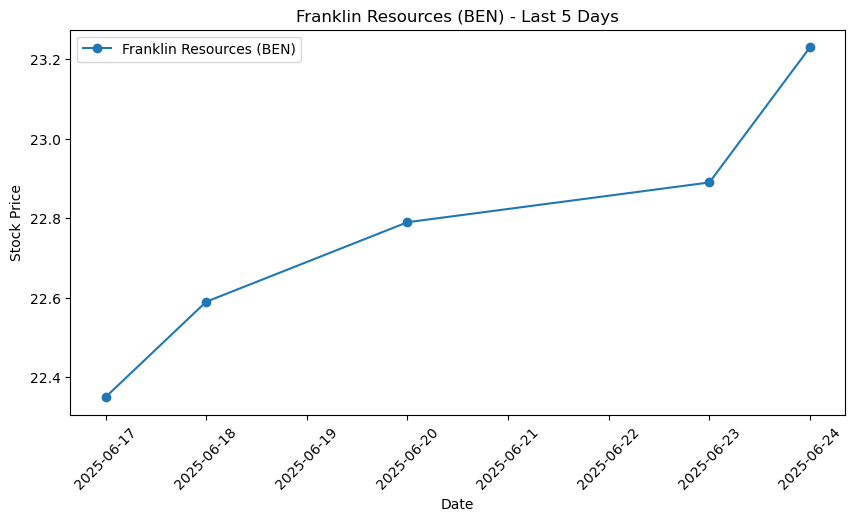

Brown & Brown (BRO)


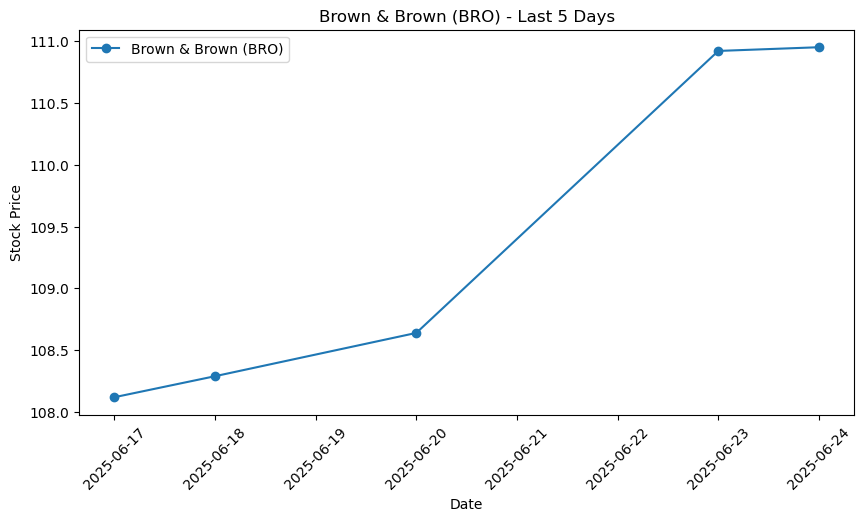

Blackstone Inc. (BX)


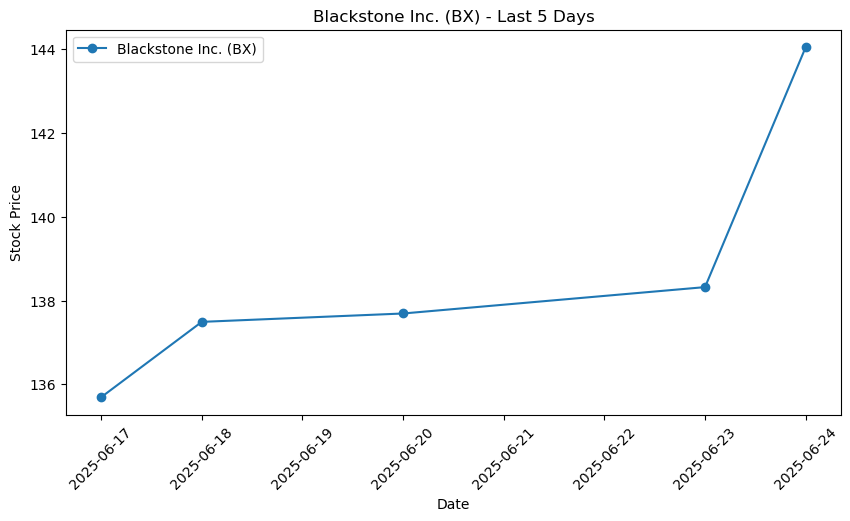

Citigroup (C)


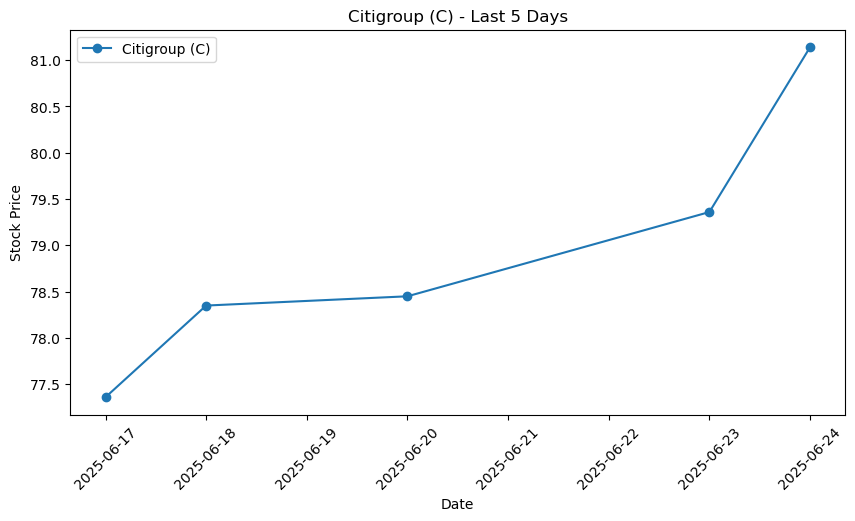

Carrier Global (CARR)


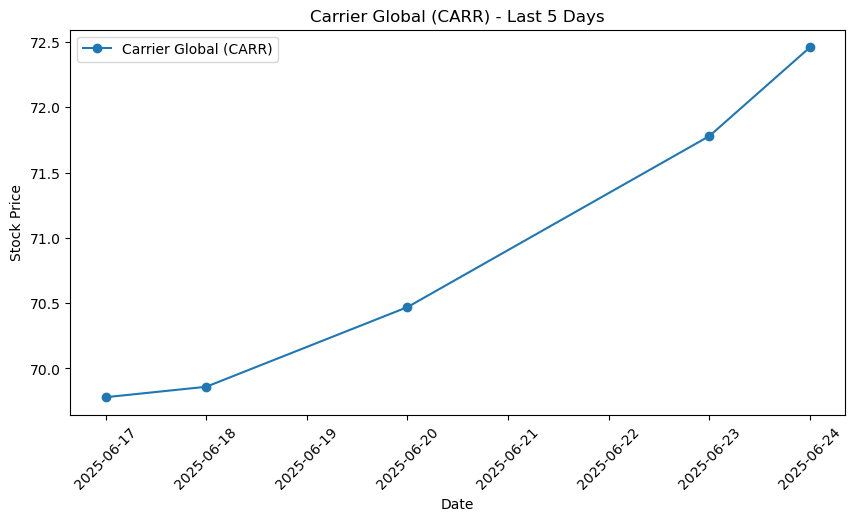

Caterpillar Inc. (CAT)


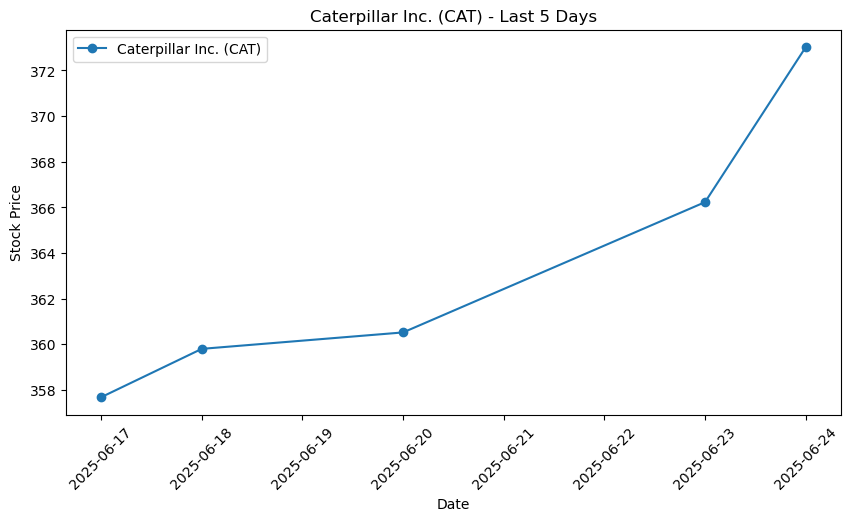

CBRE Group (CBRE)


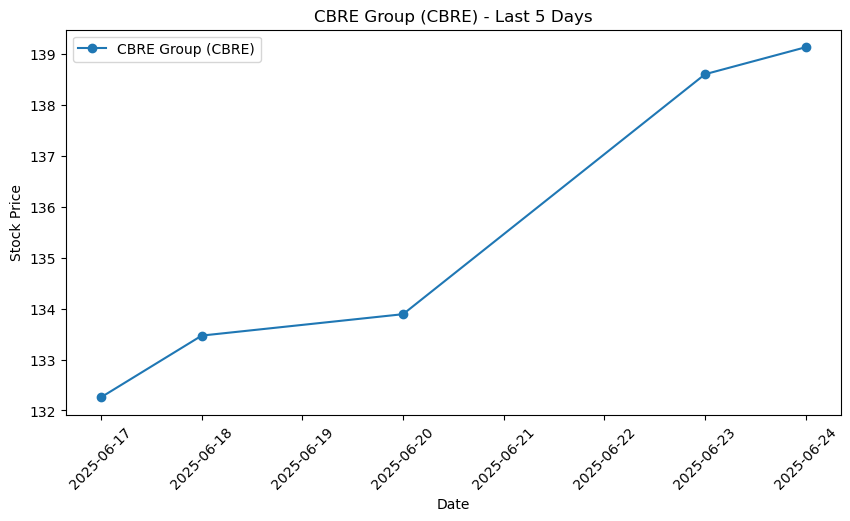

Crown Castle (CCI)


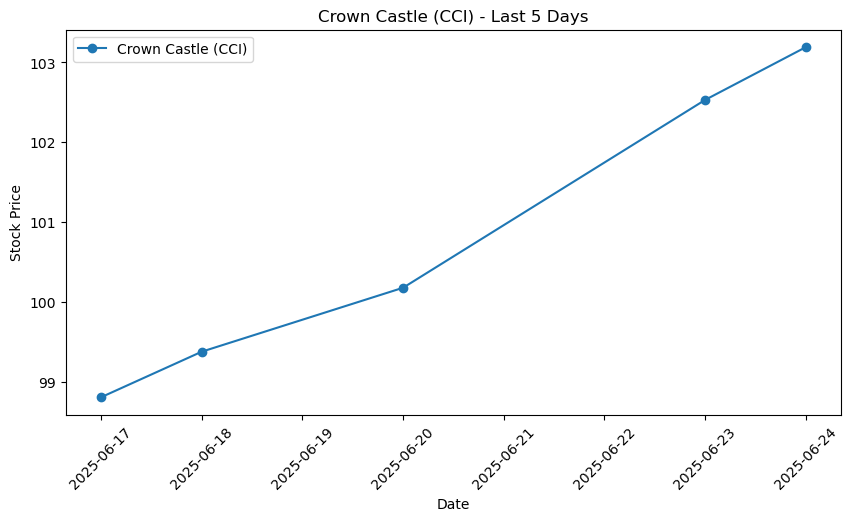

Carnival (CCL)


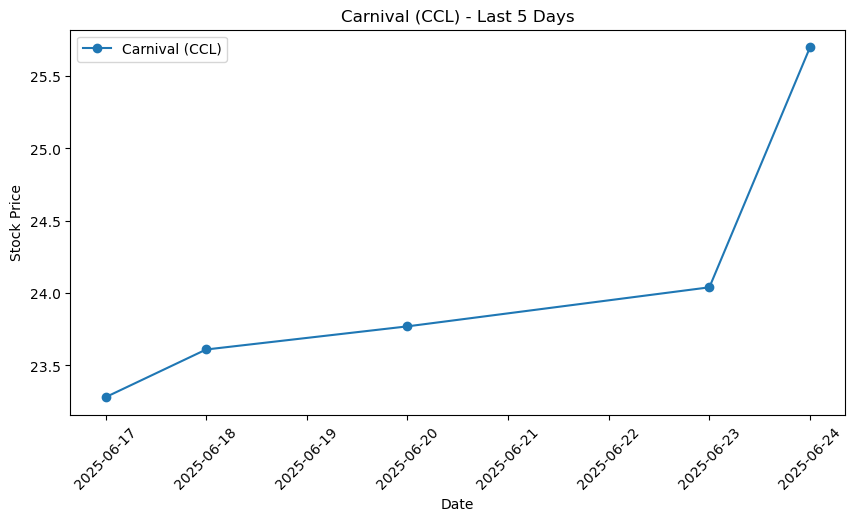

Citizens Financial Group (CFG)


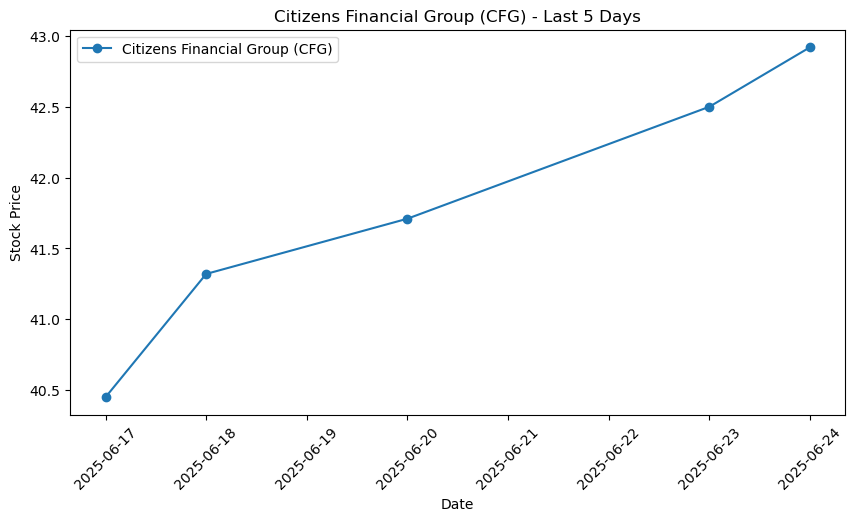

Charter Communications (CHTR)


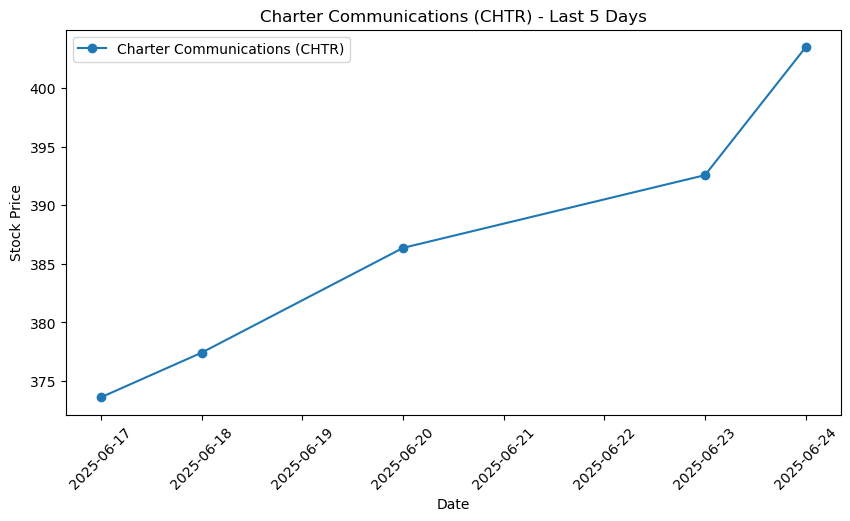

Chipotle Mexican Grill (CMG)


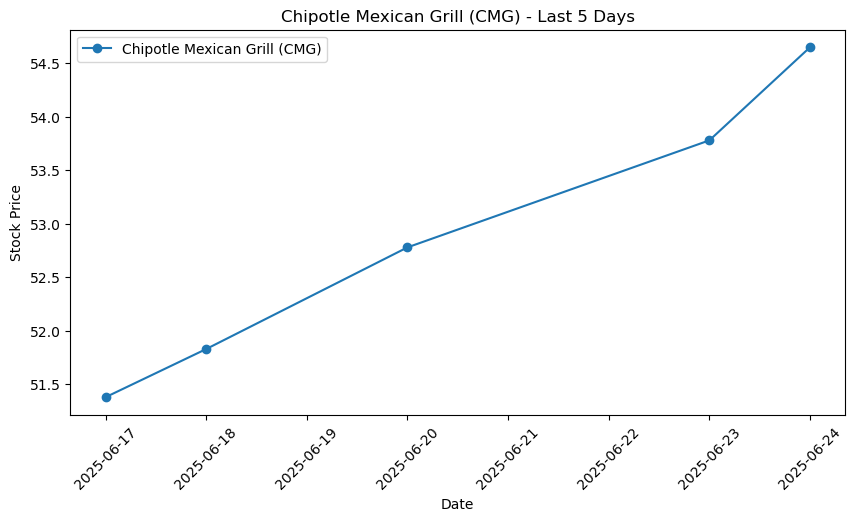

Capital One (COF)


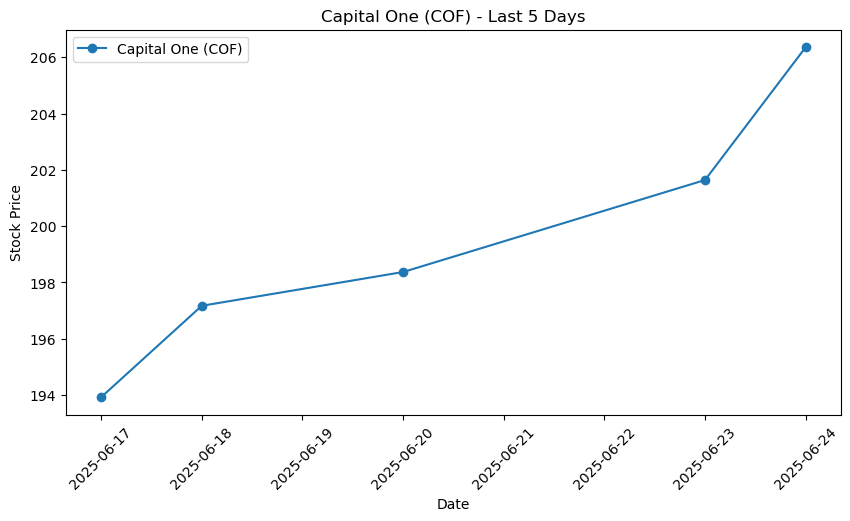

Cisco (CSCO)


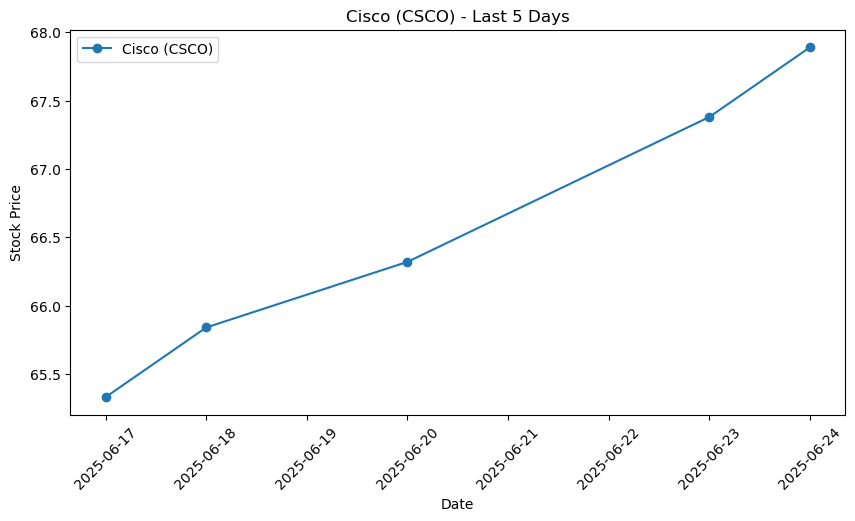

Caesars Entertainment (CZR)


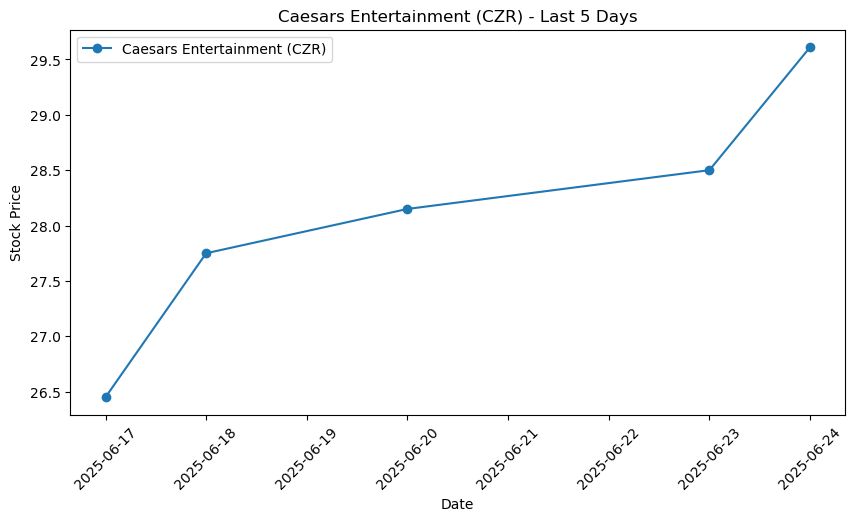

Dominion Energy (D)


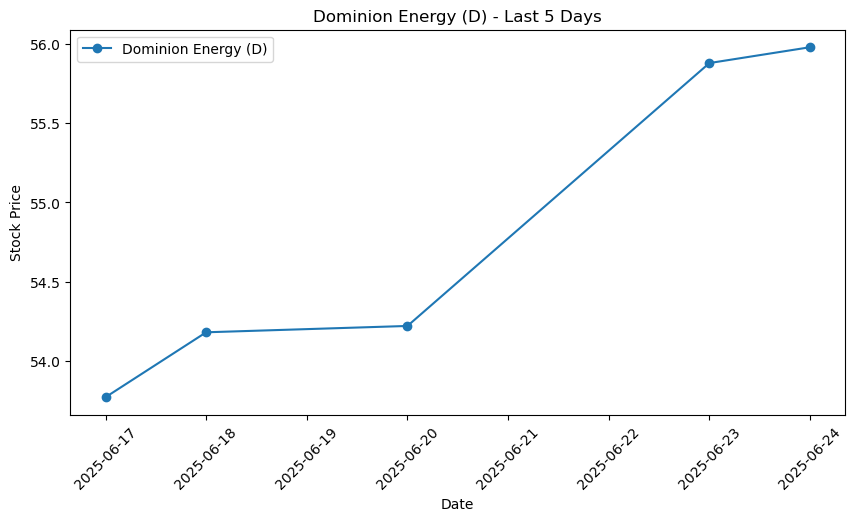

D. R. Horton (DHI)


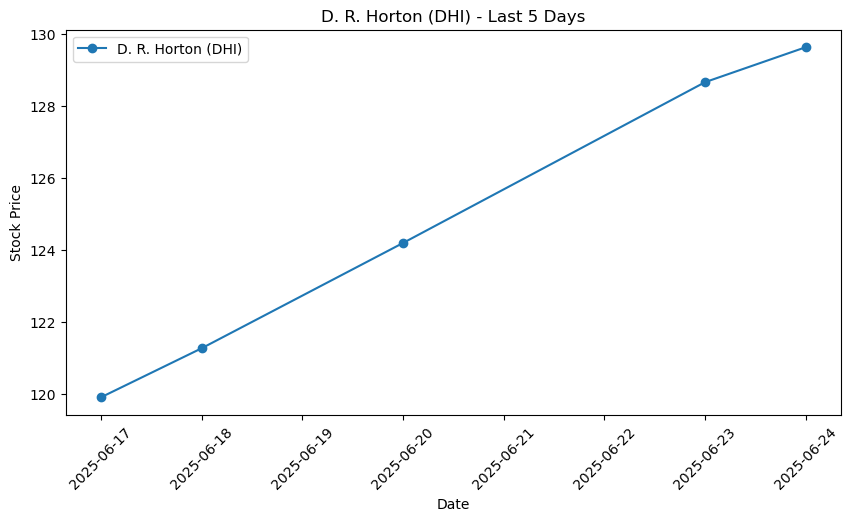

Essex Property Trust (ESS)


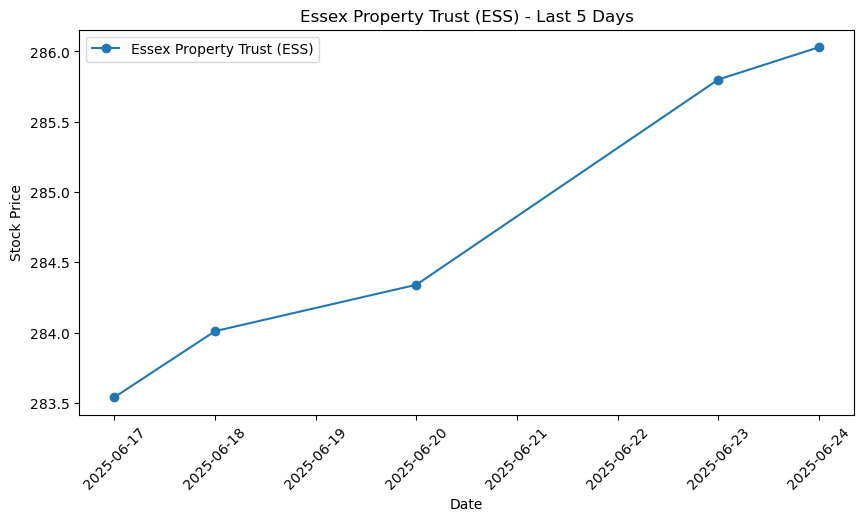

Evergy (EVRG)


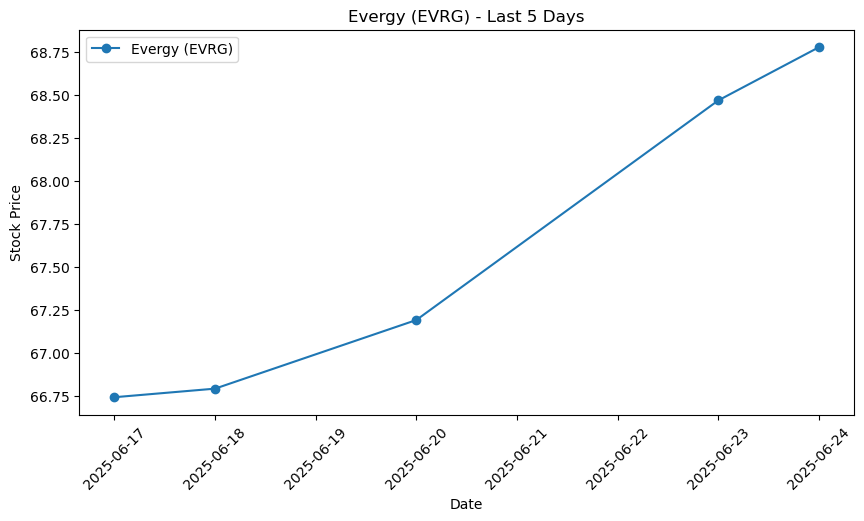

Expedia Group (EXPE)


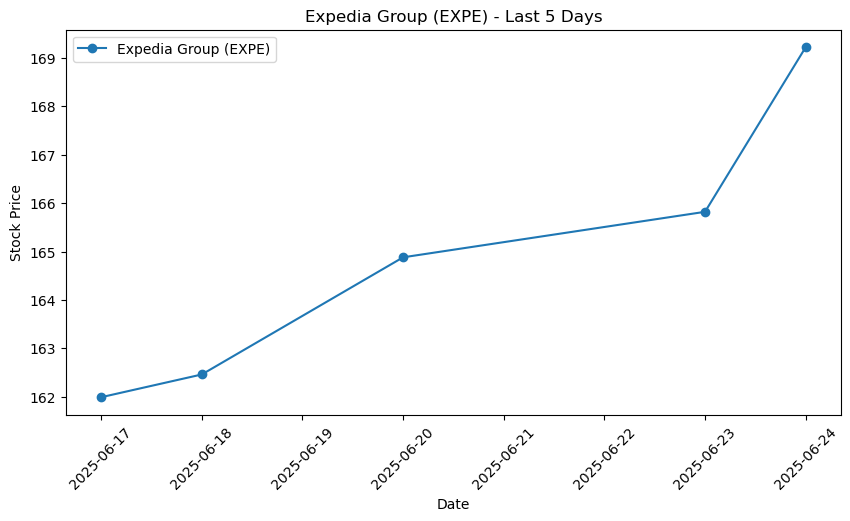

FedEx (FDX)


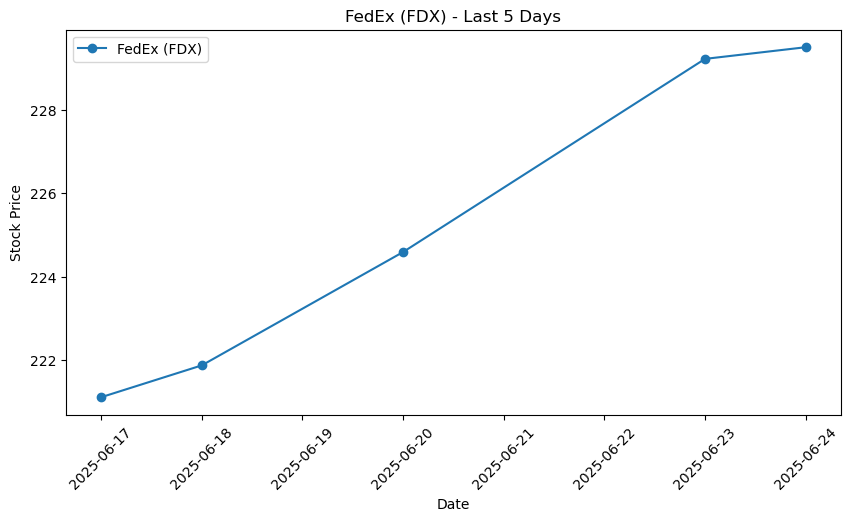

FirstEnergy (FE)


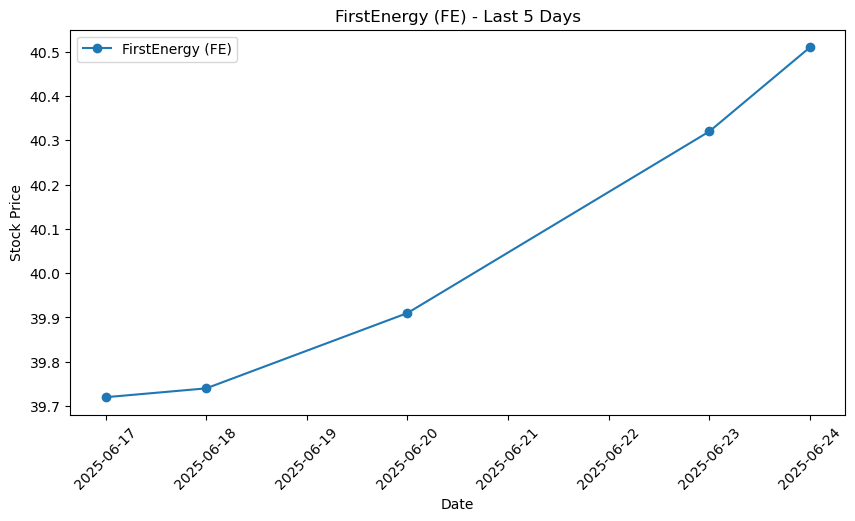

Fifth Third Bancorp (FITB)


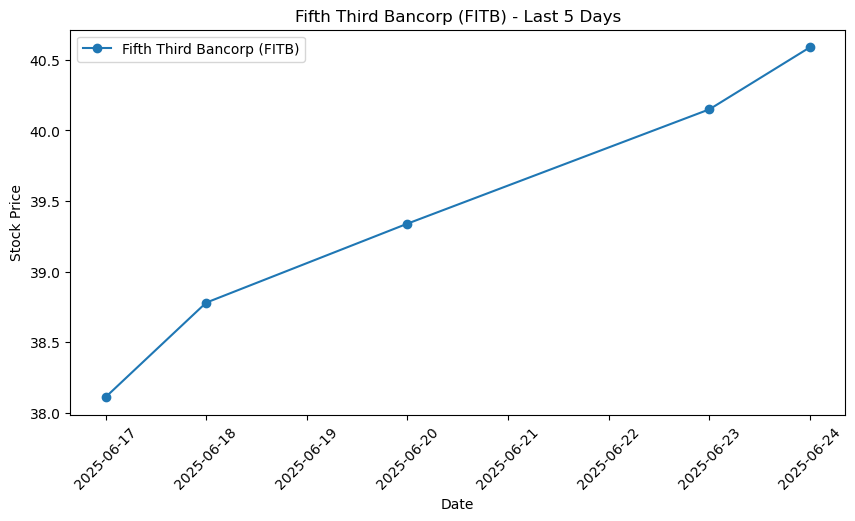

GE Aerospace (GE)


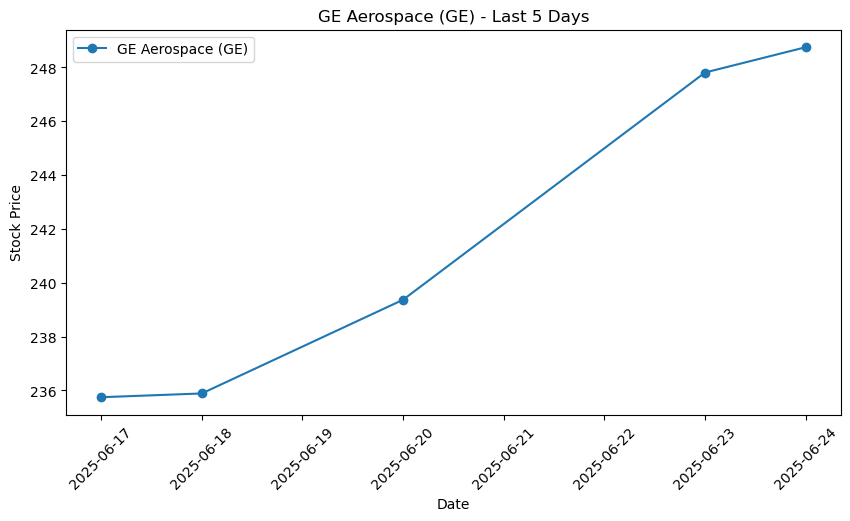

Globe Life (GL)


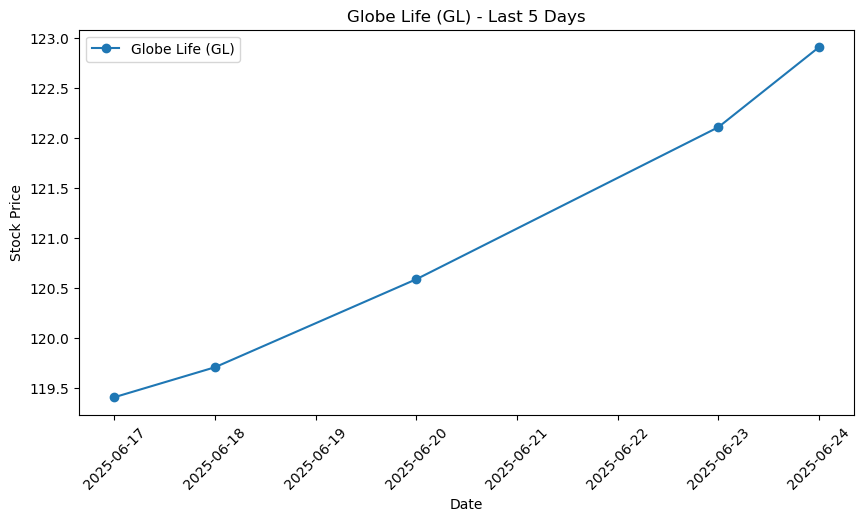

Generac (GNRC)


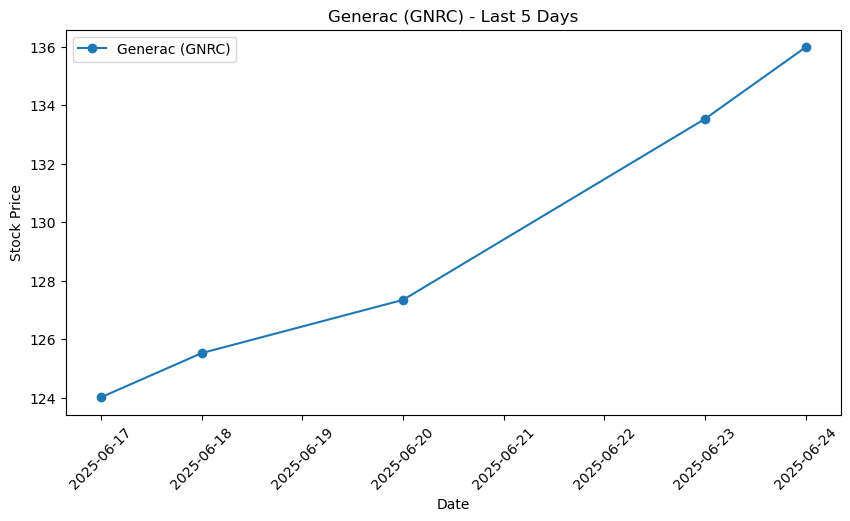

Garmin (GRMN)


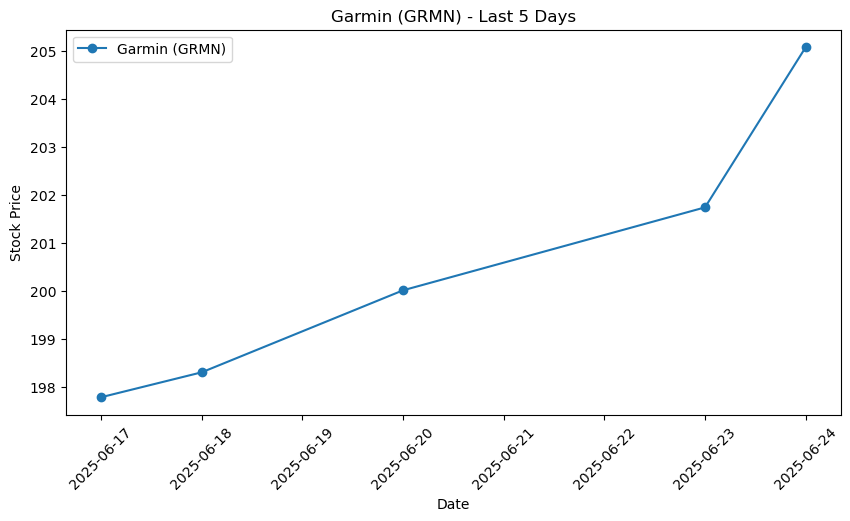

Goldman Sachs (GS)


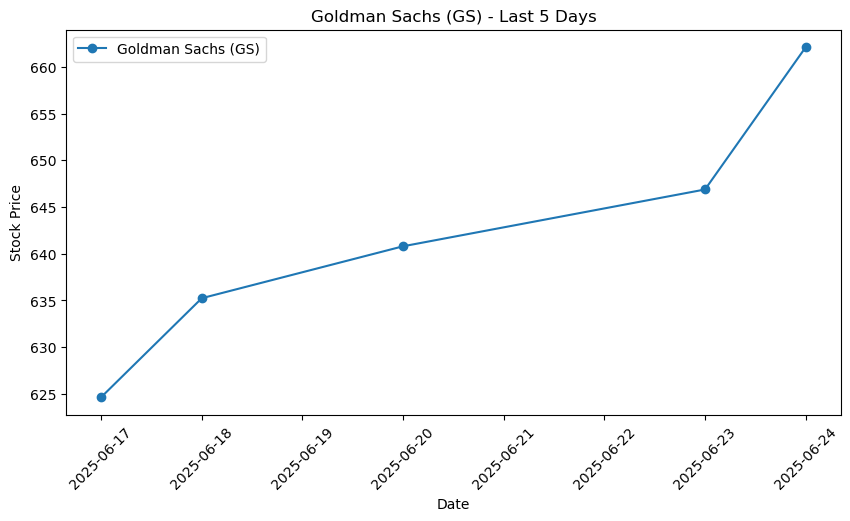

Hasbro (HAS)


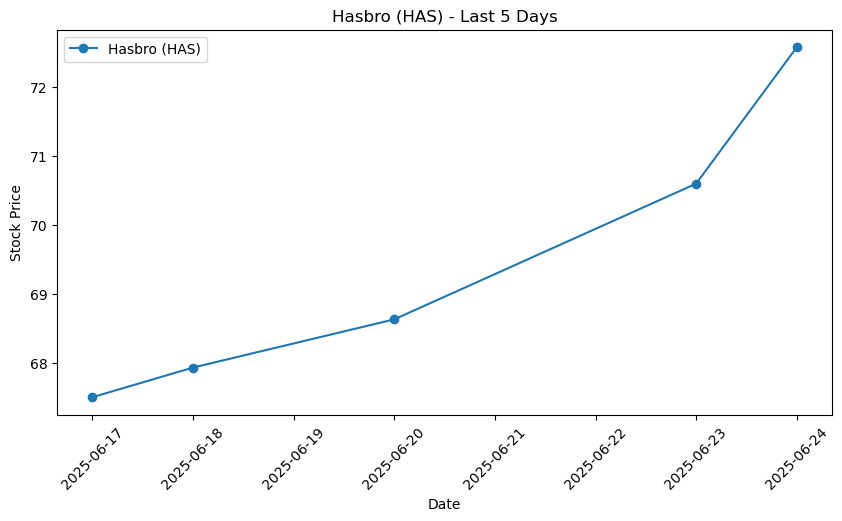

Huntington Bancshares (HBAN)


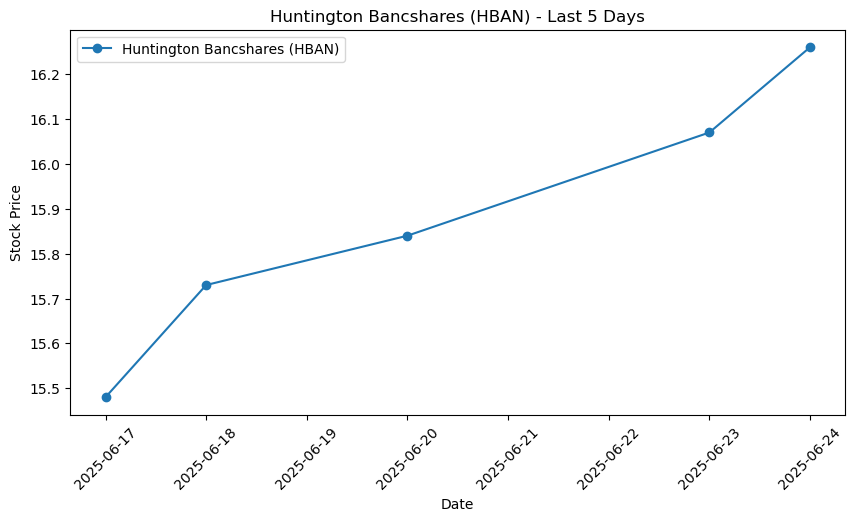

HCA Healthcare (HCA)


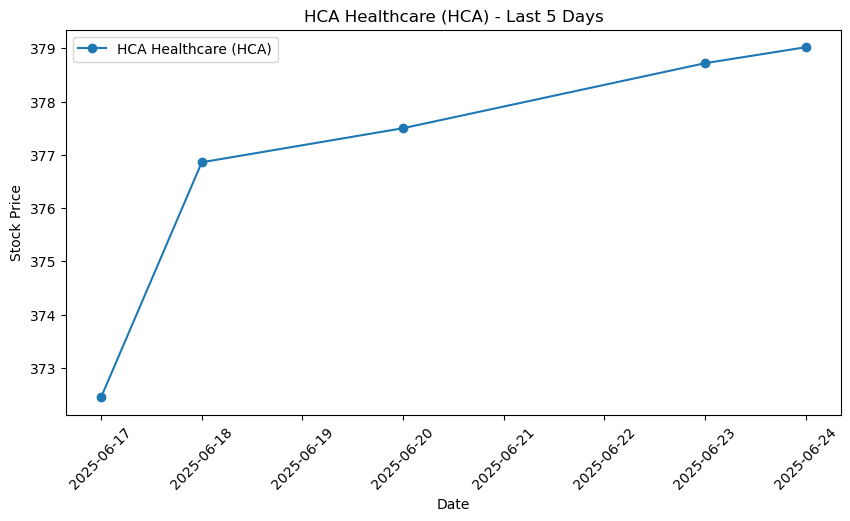

Hilton Worldwide (HLT)


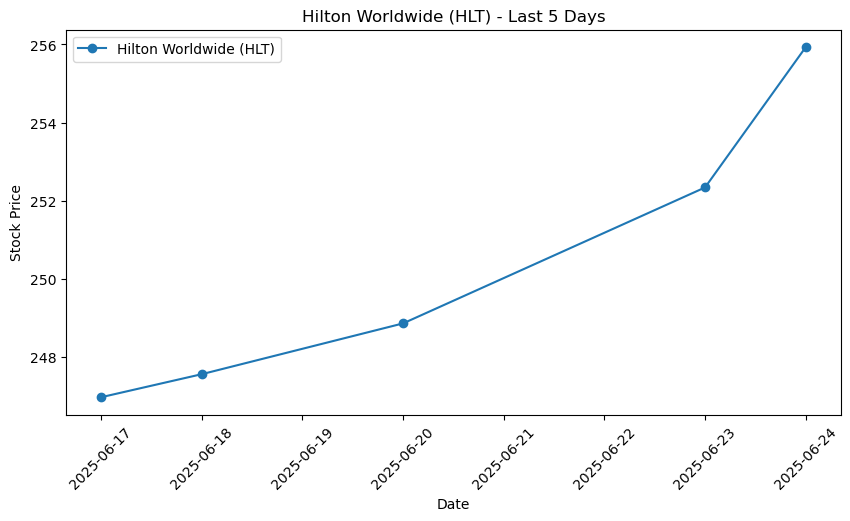

Interpublic Group of Companies (The) (IPG)


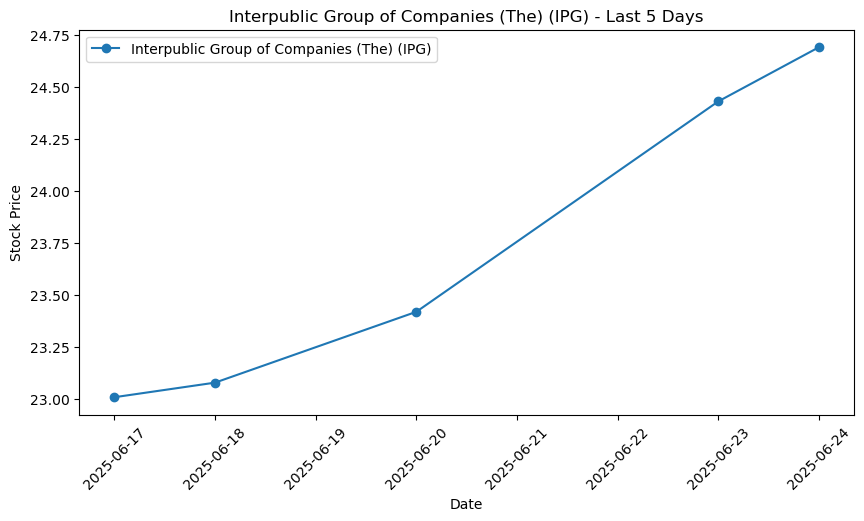

IQVIA (IQV)


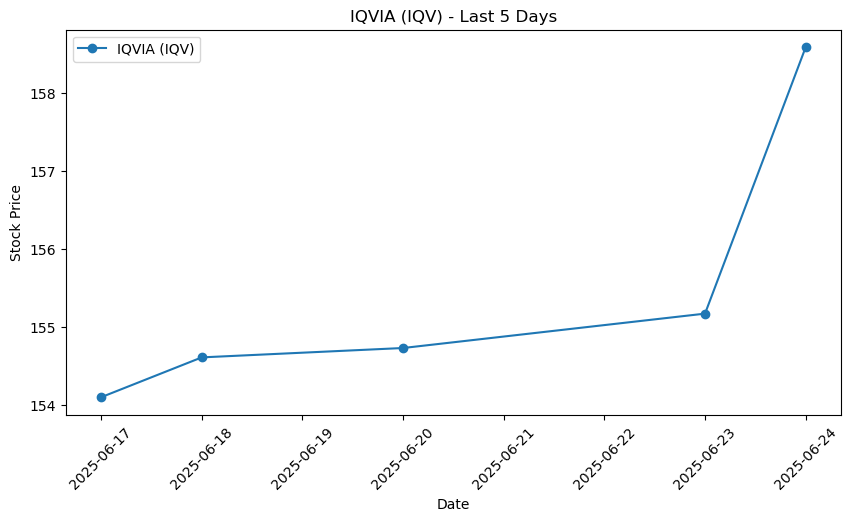

Invesco (IVZ)


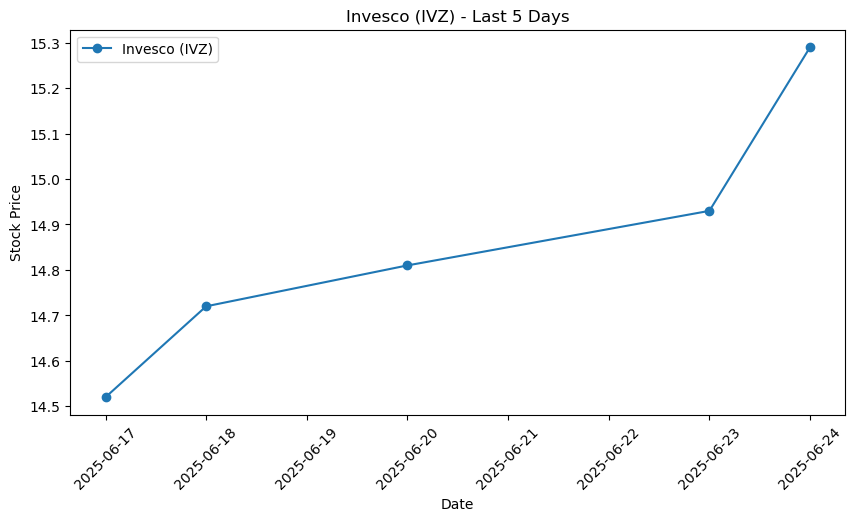

Jabil (JBL)


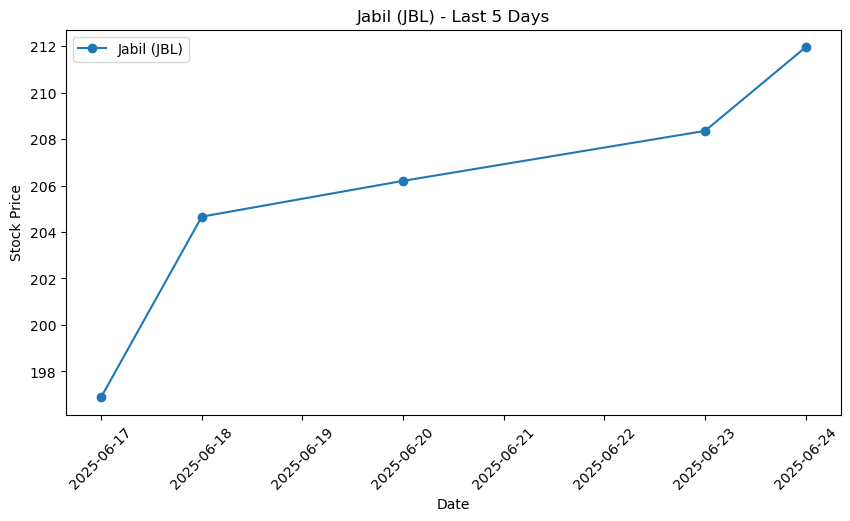

JPMorgan Chase (JPM)


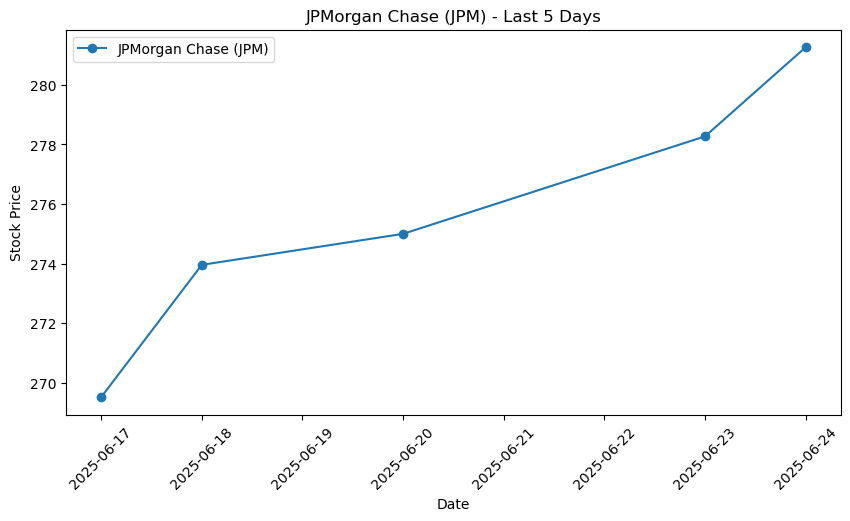

KeyCorp (KEY)


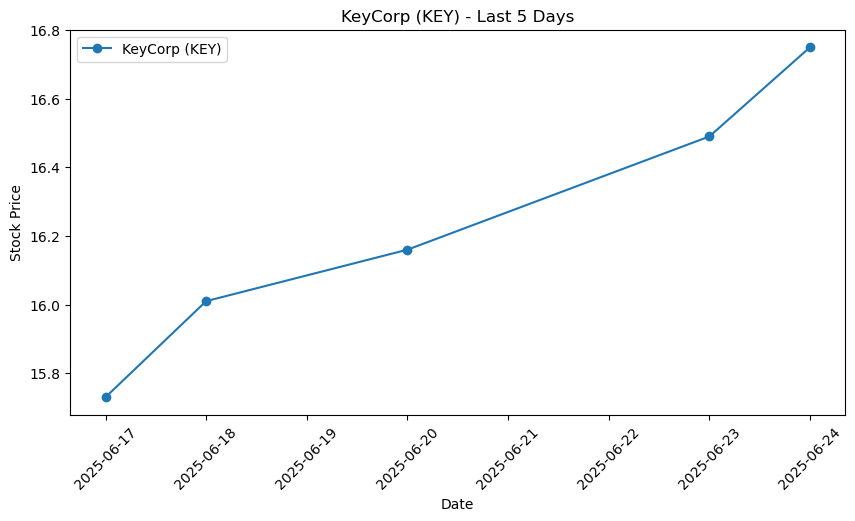

Kinder Morgan (KMI)


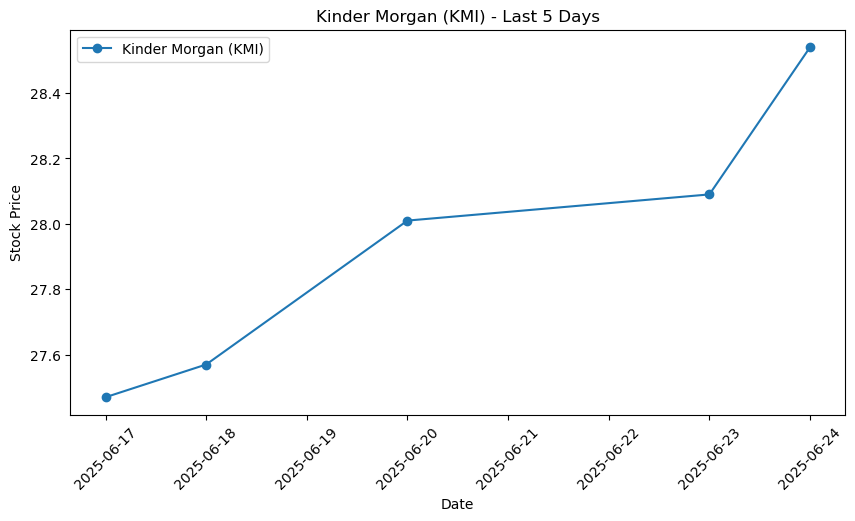

Lennox International (LII)


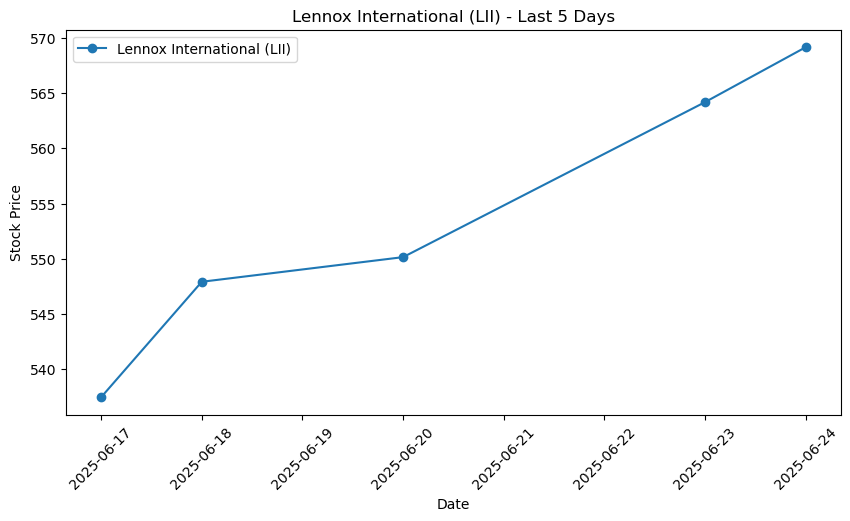

Marriott International (MAR)


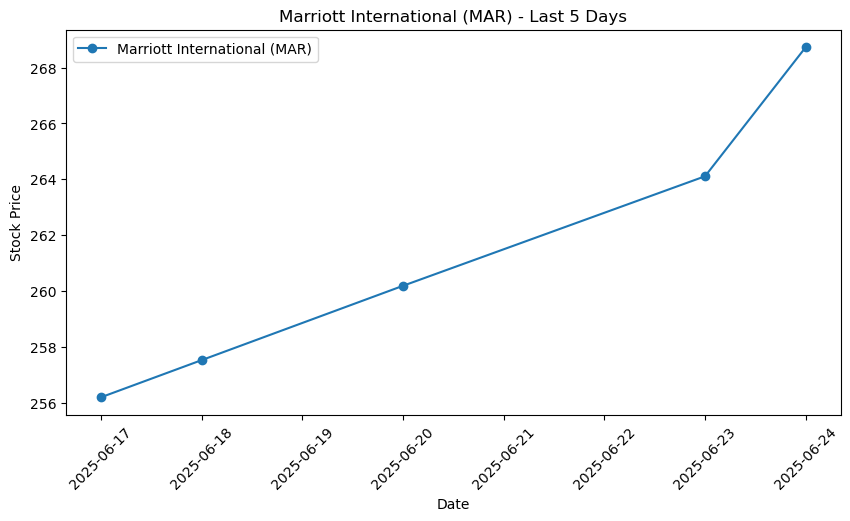

MetLife (MET)


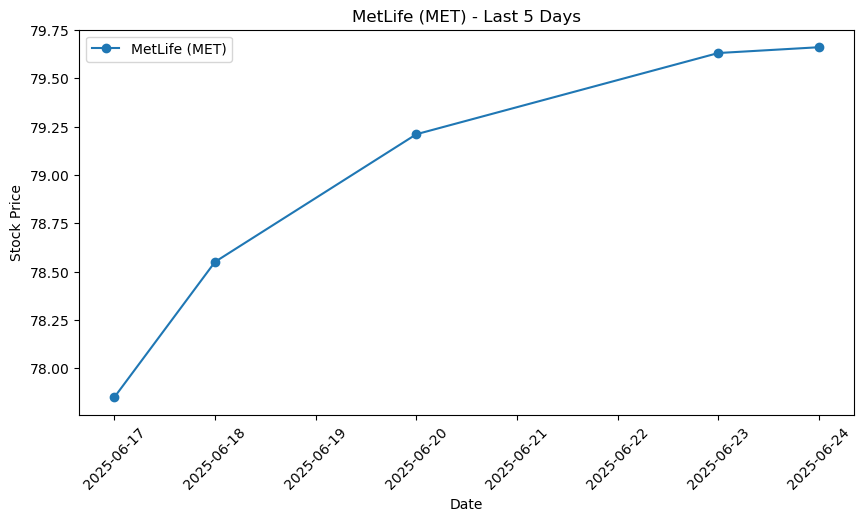

3M (MMM)


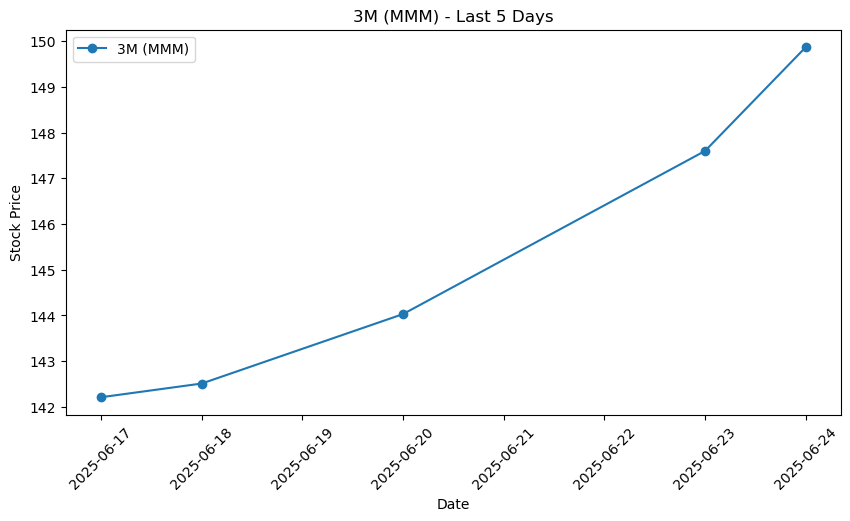

Morgan Stanley (MS)


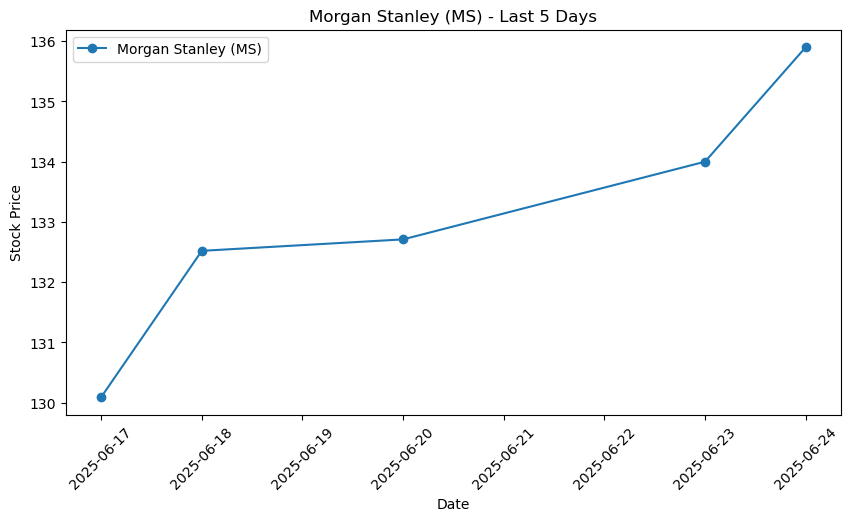

M&T Bank (MTB)


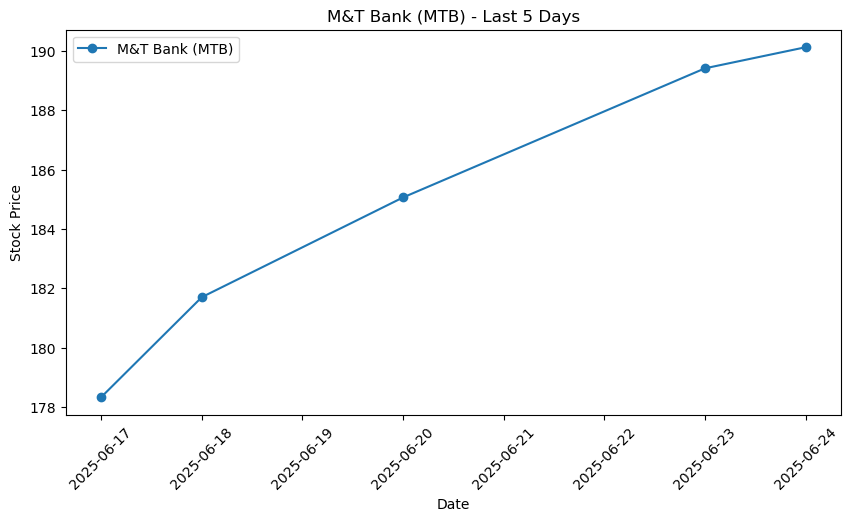

Match Group (MTCH)


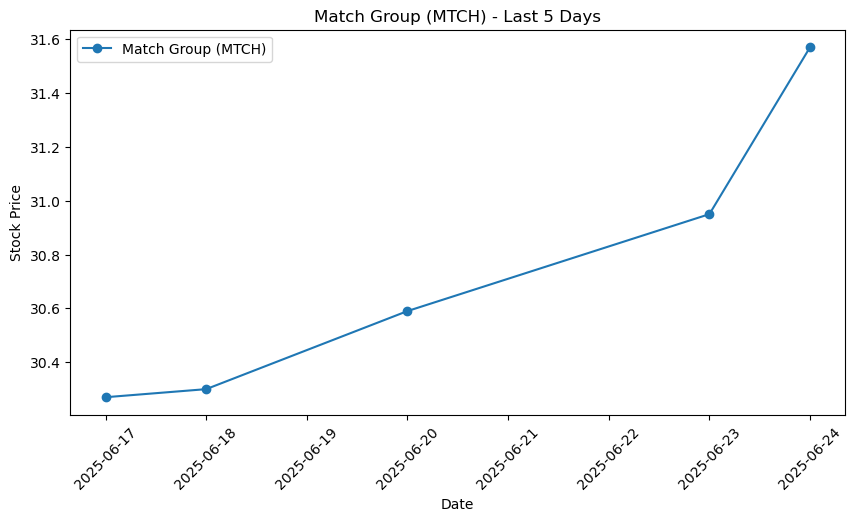

Netflix (NFLX)


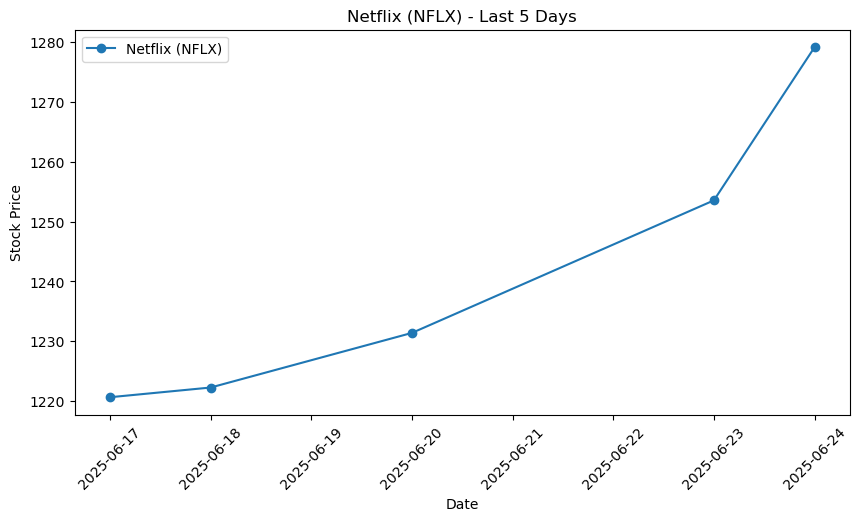

Norfolk Southern (NSC)


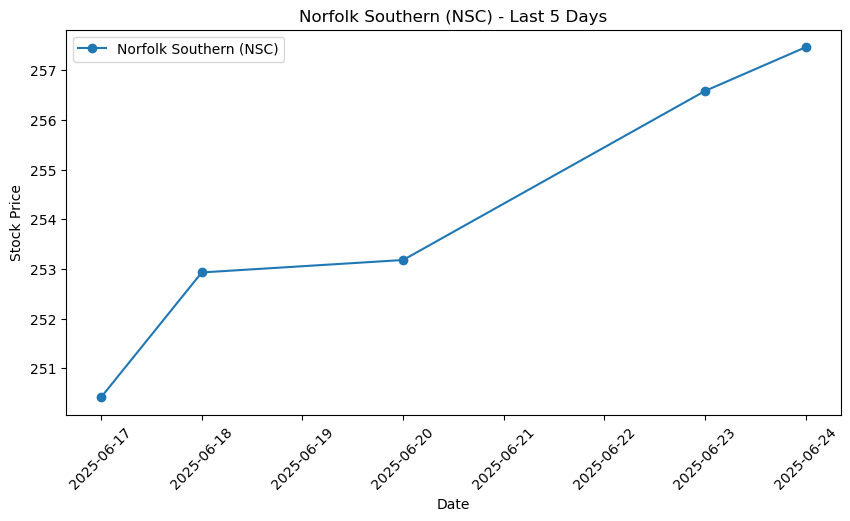

News Corp (Class B) (NWS)


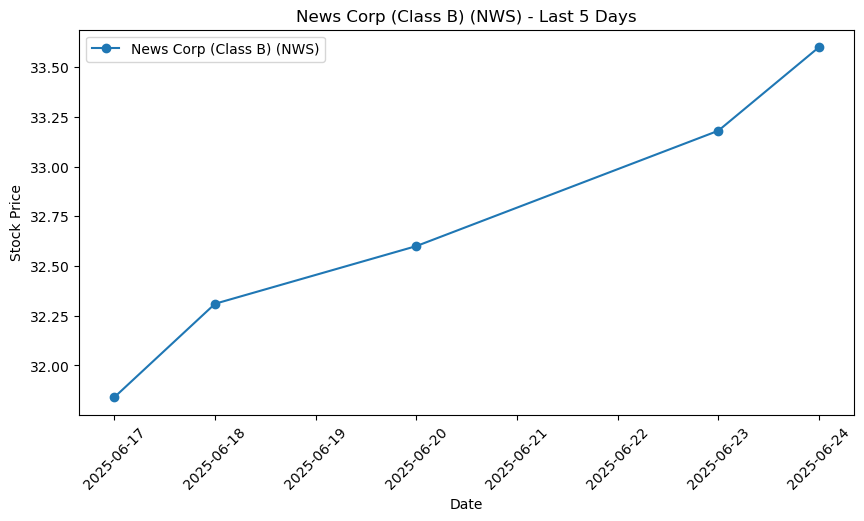

News Corp (Class A) (NWSA)


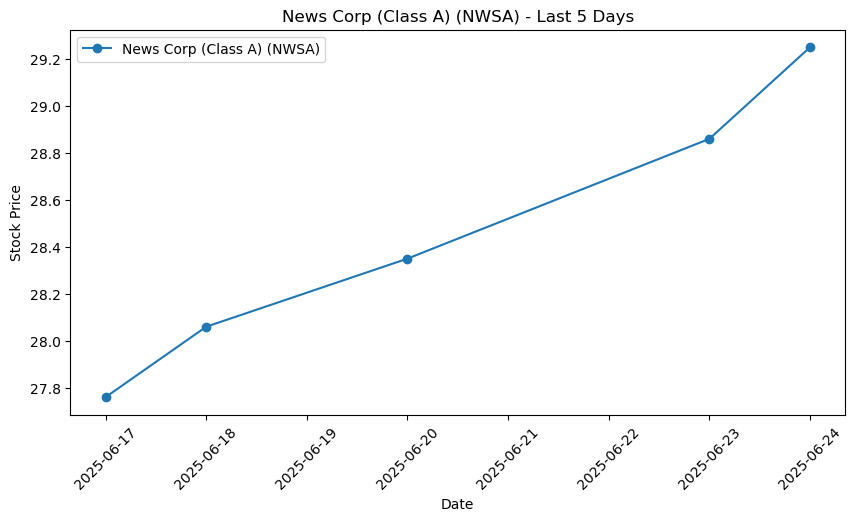

Omnicom Group (OMC)


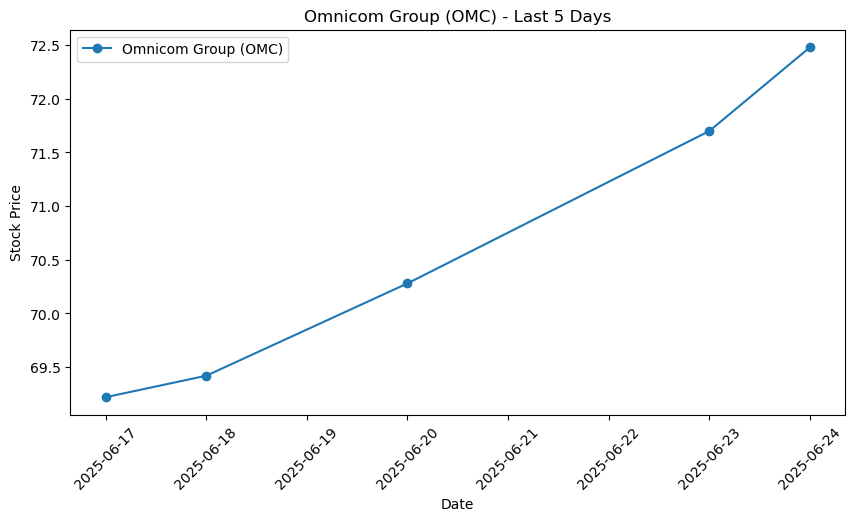

Principal Financial Group (PFG)


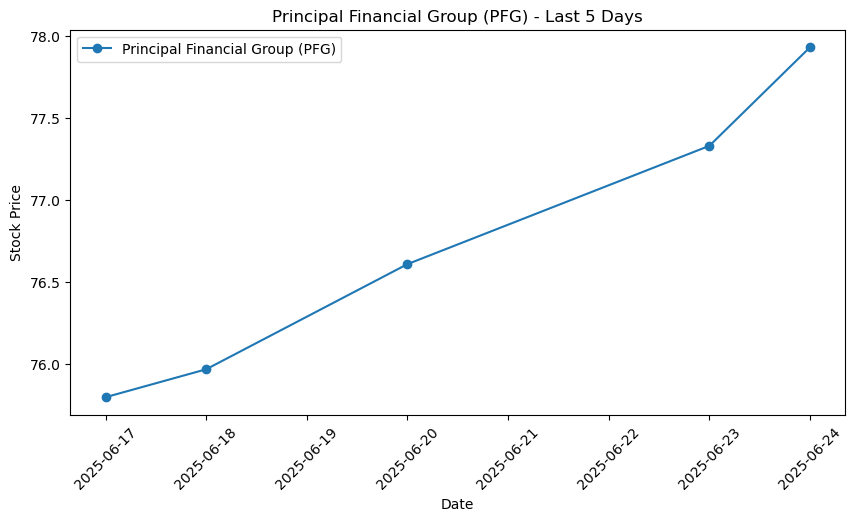

Parker Hannifin (PH)


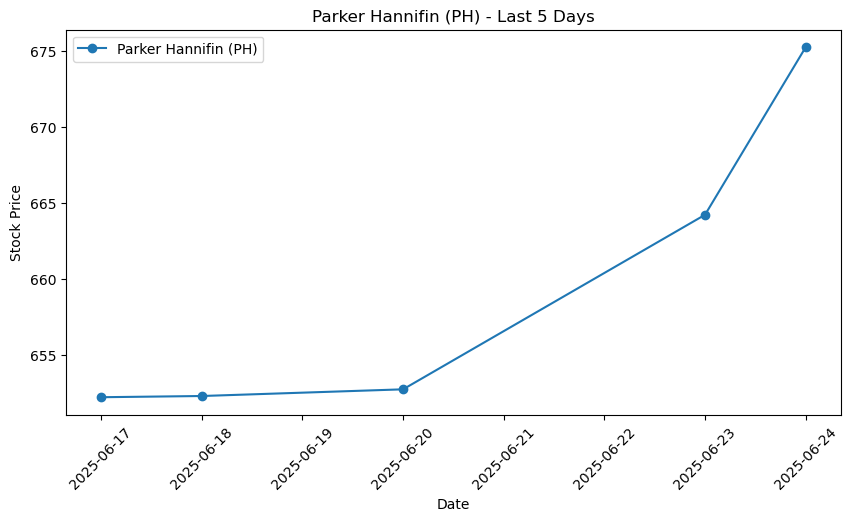

PulteGroup (PHM)


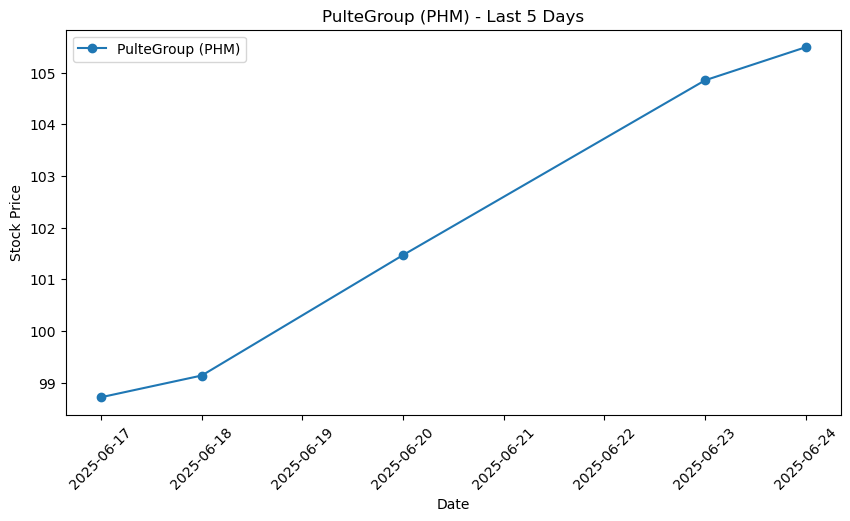

PNC Financial Services (PNC)


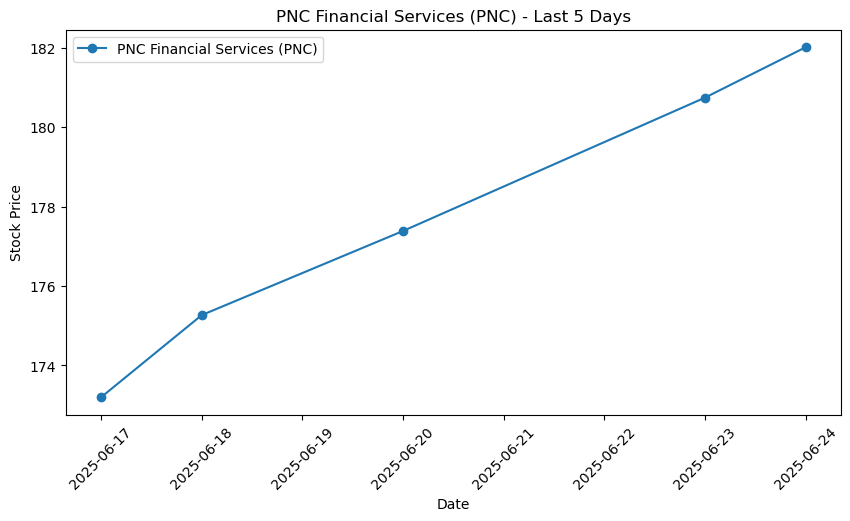

Pentair (PNR)


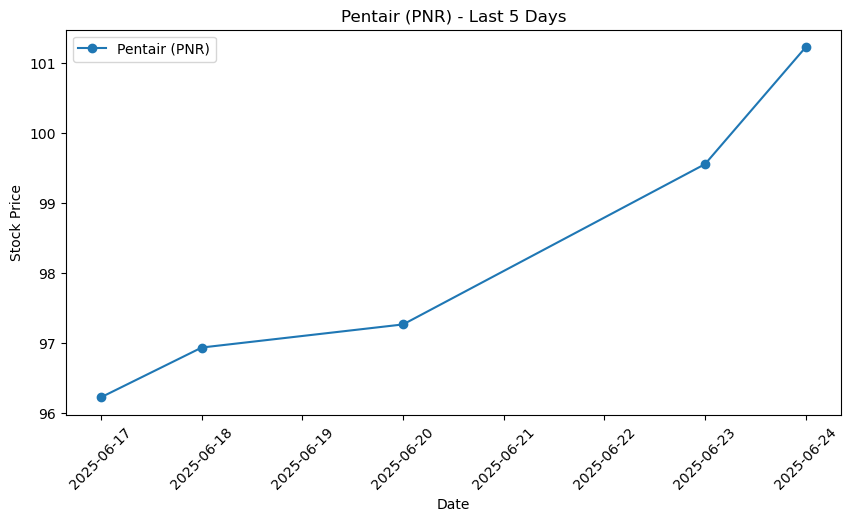

PPG Industries (PPG)


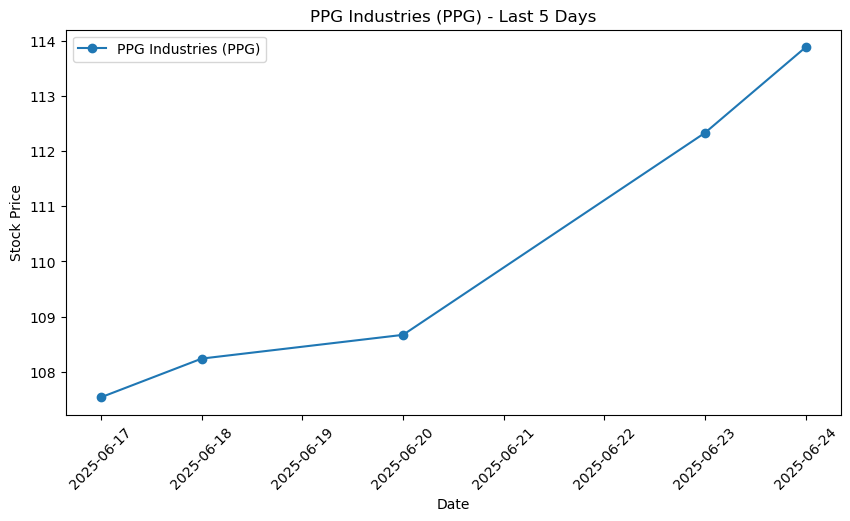

Prudential Financial (PRU)


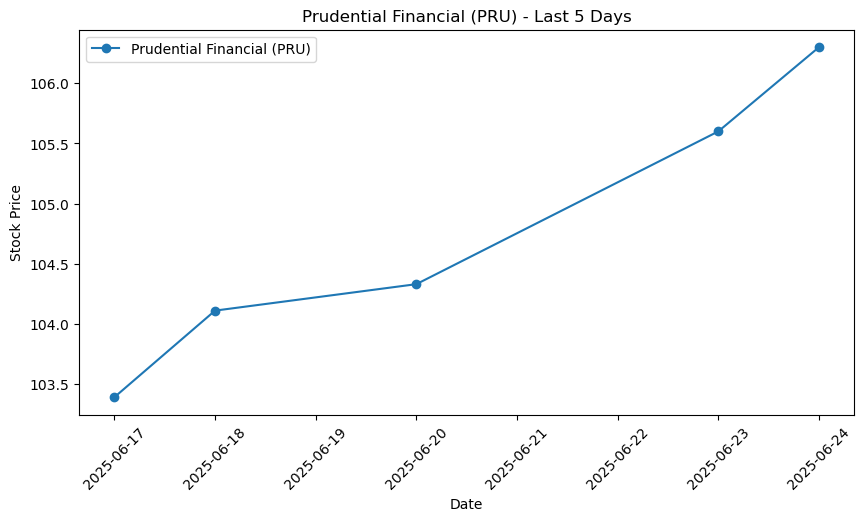

Quanta Services (PWR)


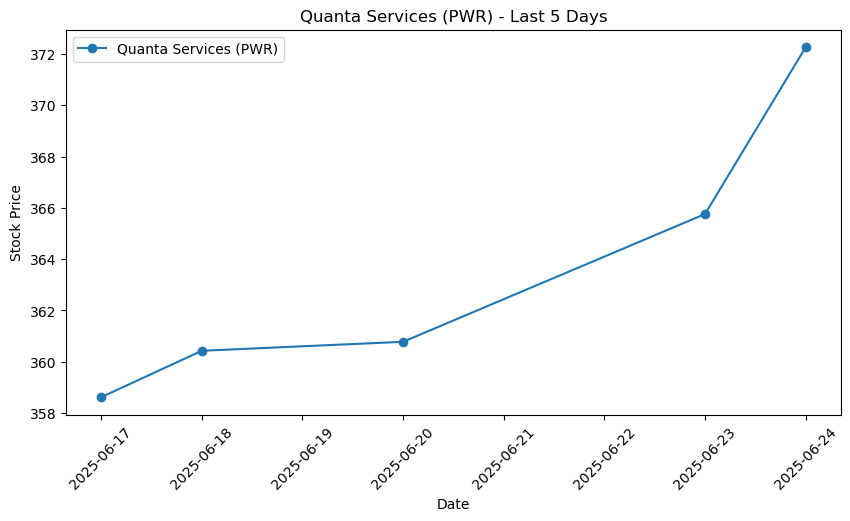

Royal Caribbean Group (RCL)


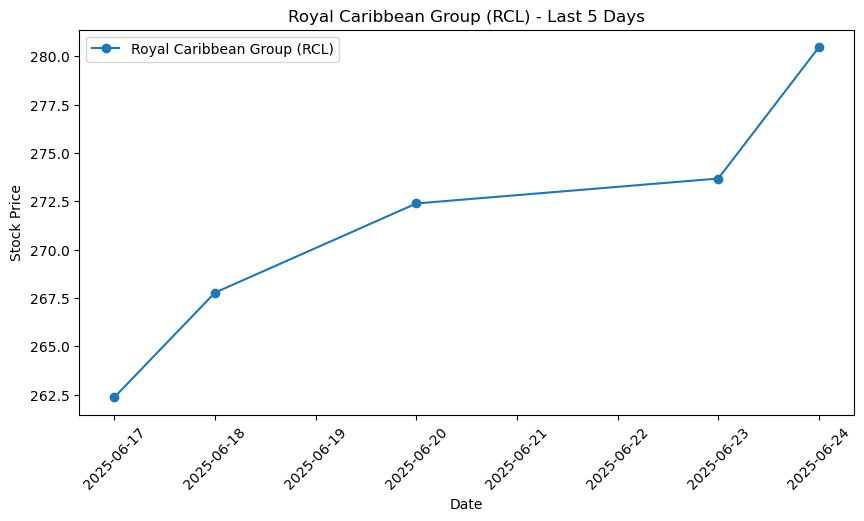

Regions Financial Corporation (RF)


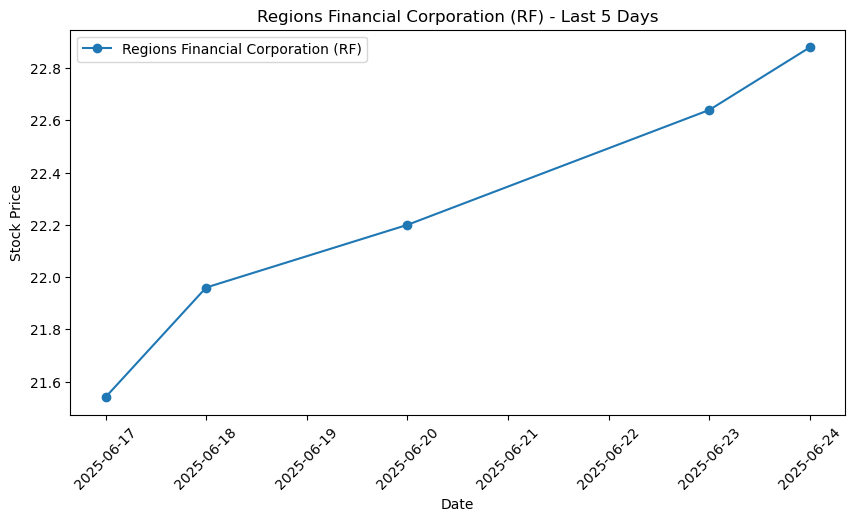

ResMed (RMD)


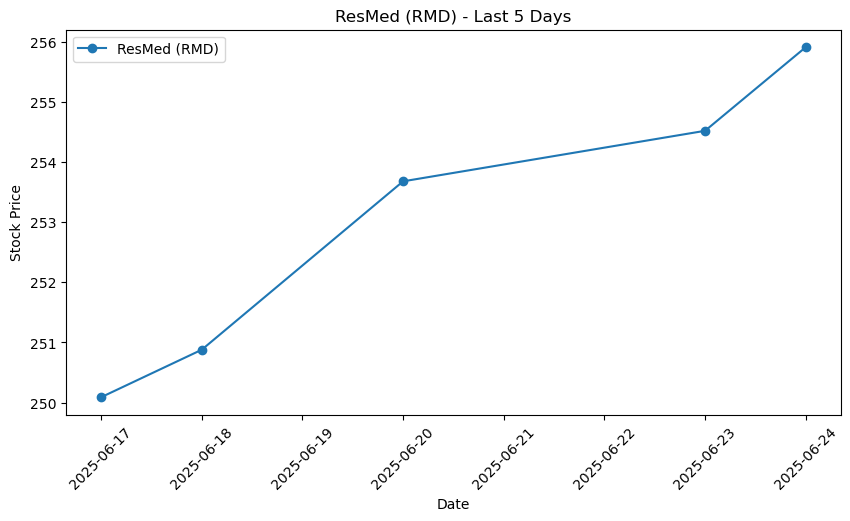

Sherwin-Williams (SHW)


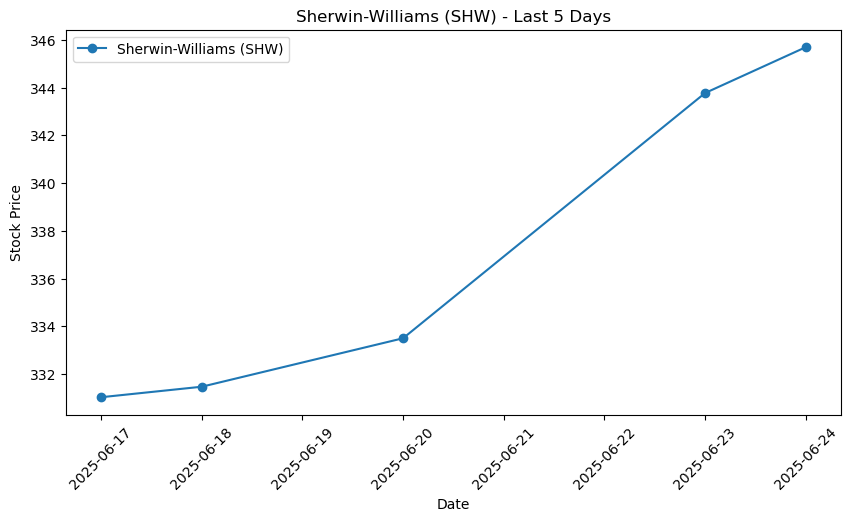

Southern Company (SO)


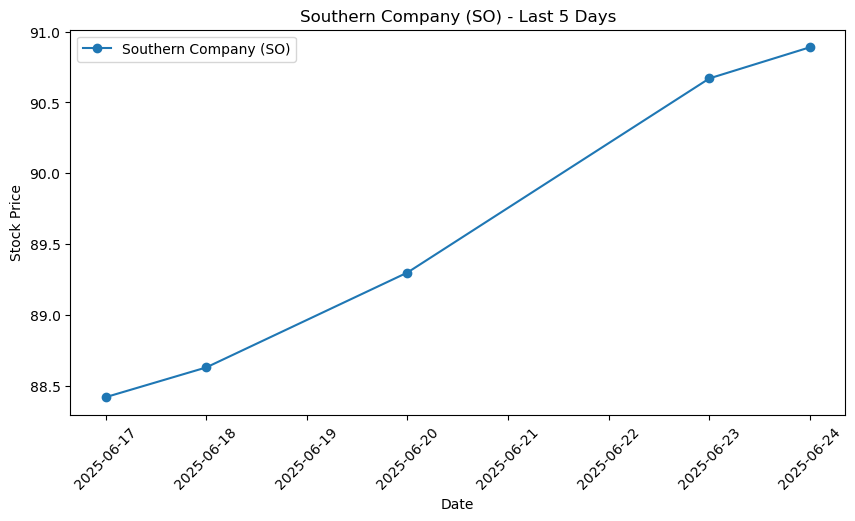

S&P Global (SPGI)


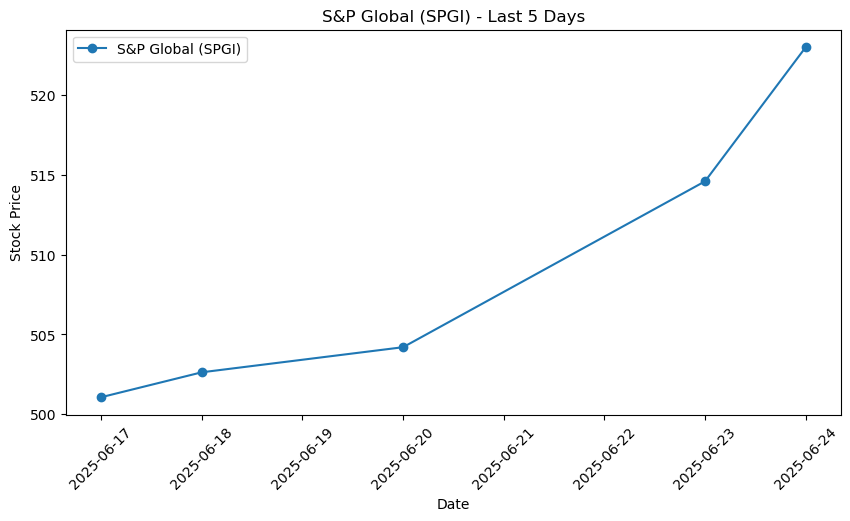

State Street Corporation (STT)


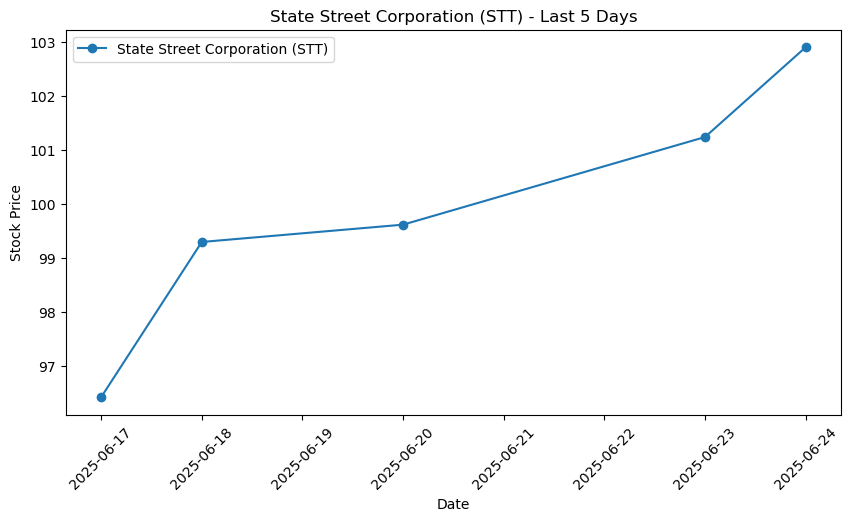

Skyworks Solutions (SWKS)


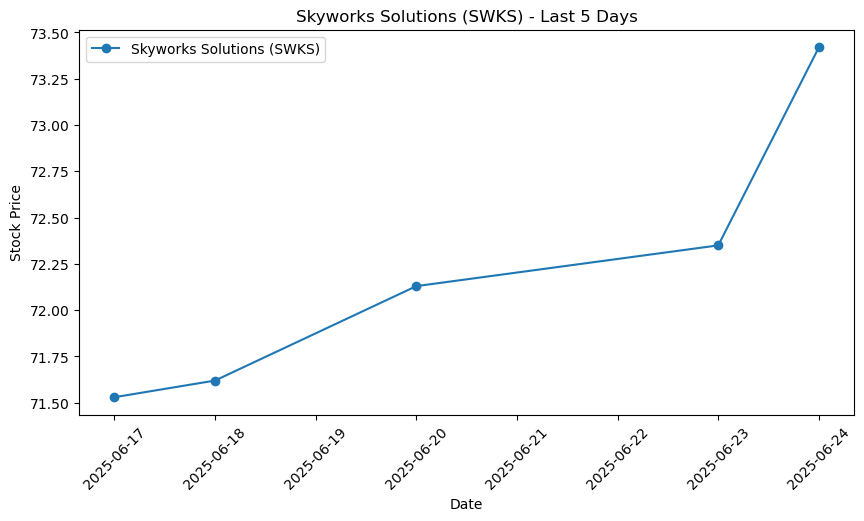

Synchrony Financial (SYF)


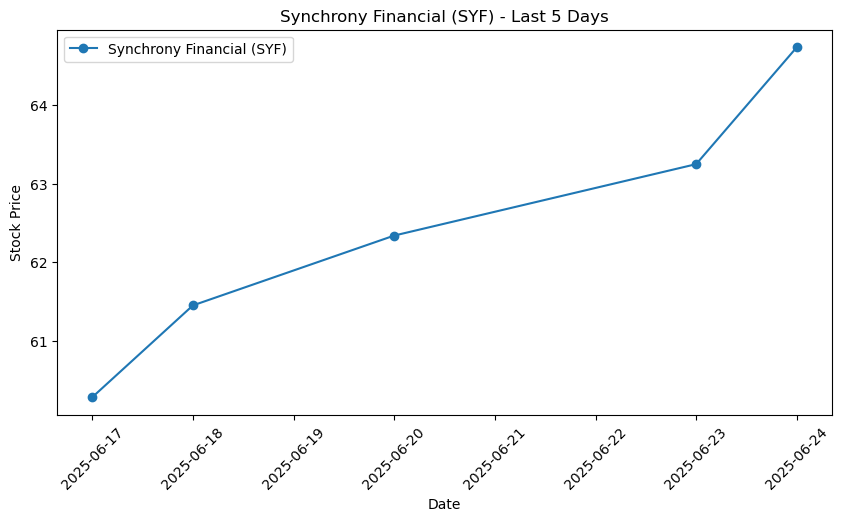

AT&T (T)


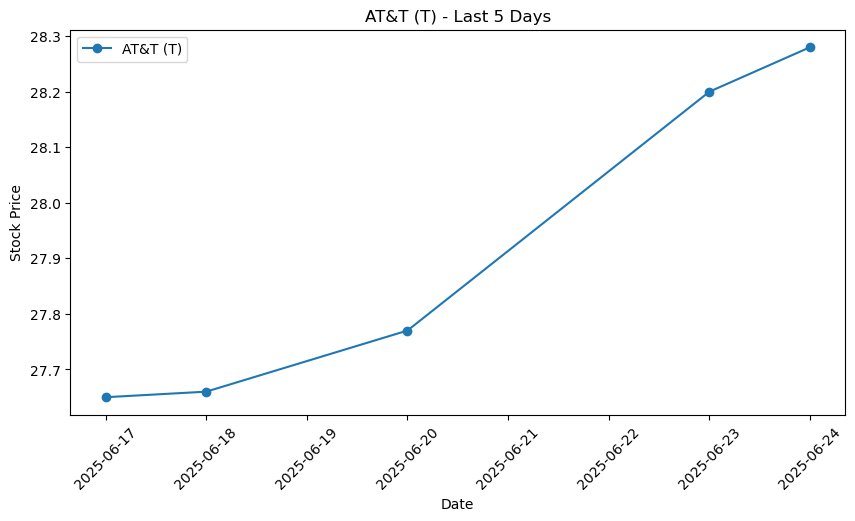

Truist Financial (TFC)


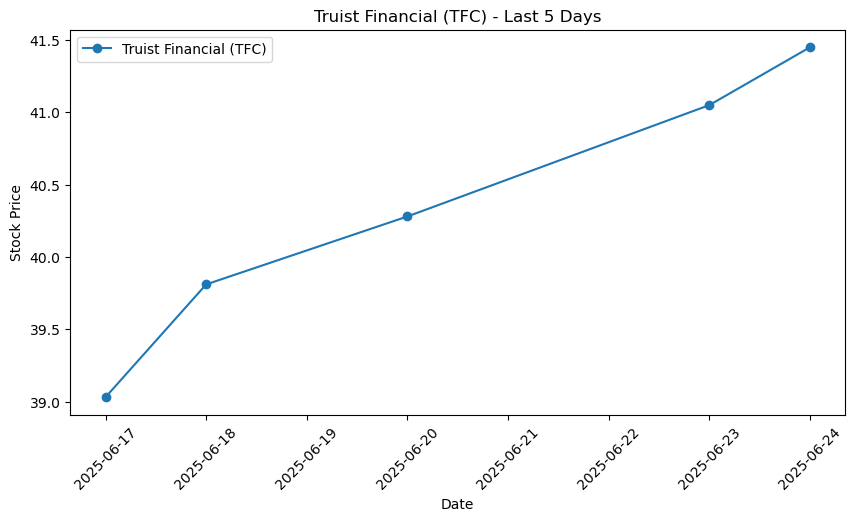

Target Corporation (TGT)


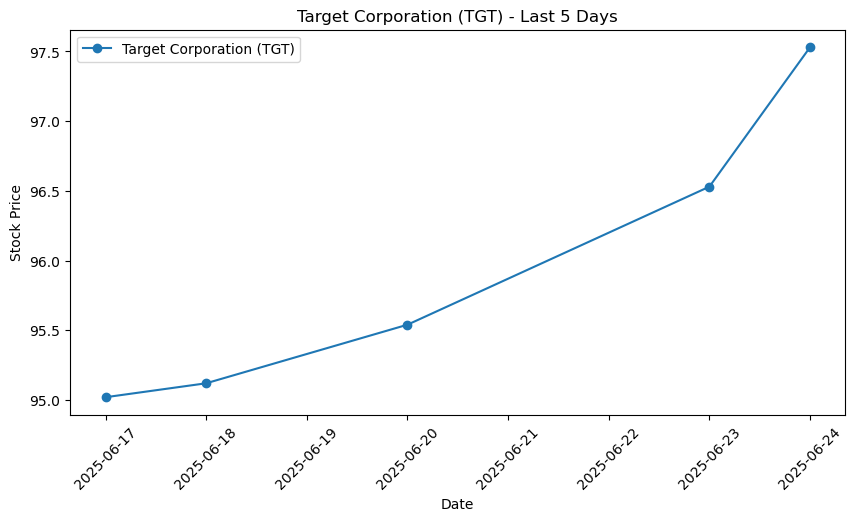

Thermo Fisher Scientific (TMO)


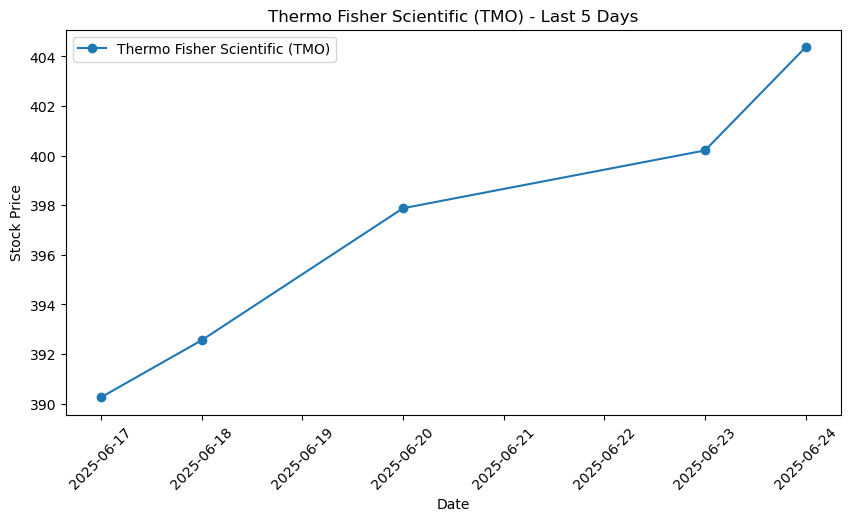

Tapestry, Inc. (TPR)


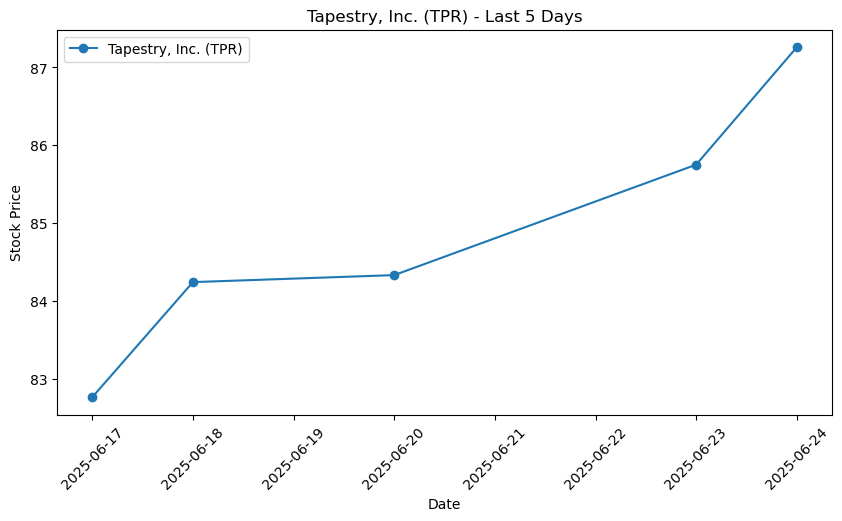

T. Rowe Price (TROW)


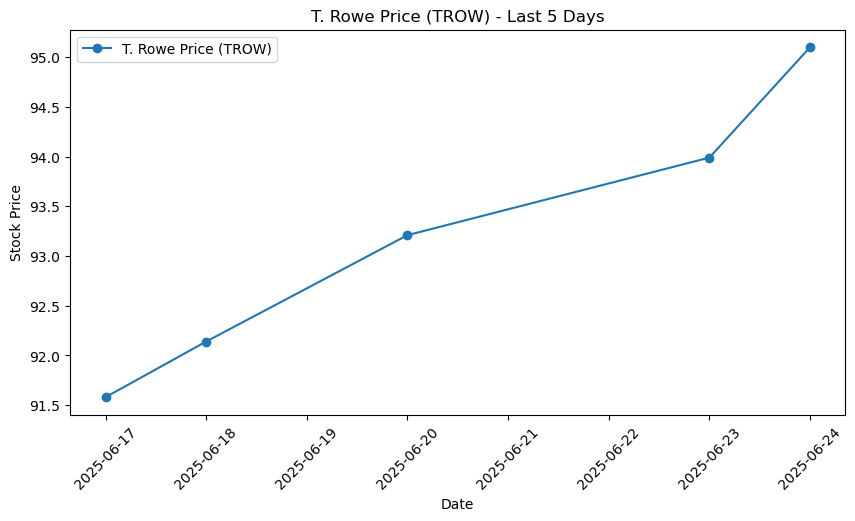

Union Pacific Corporation (UNP)


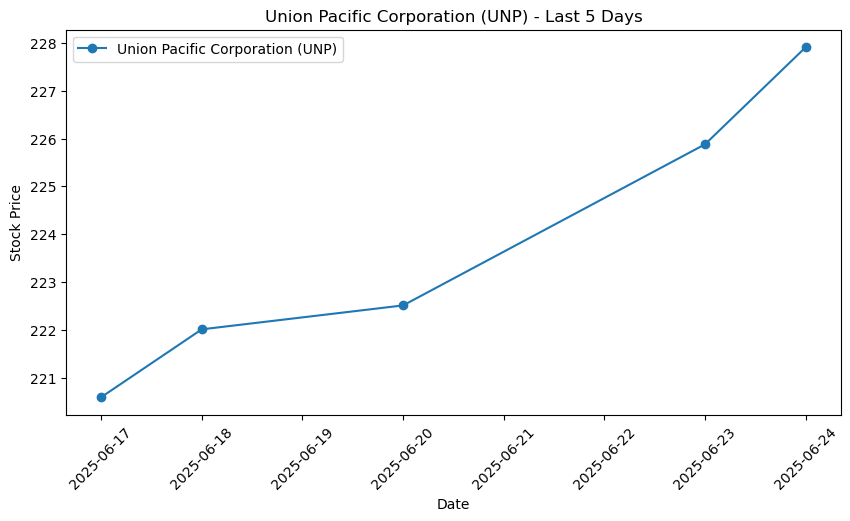

United Rentals (URI)


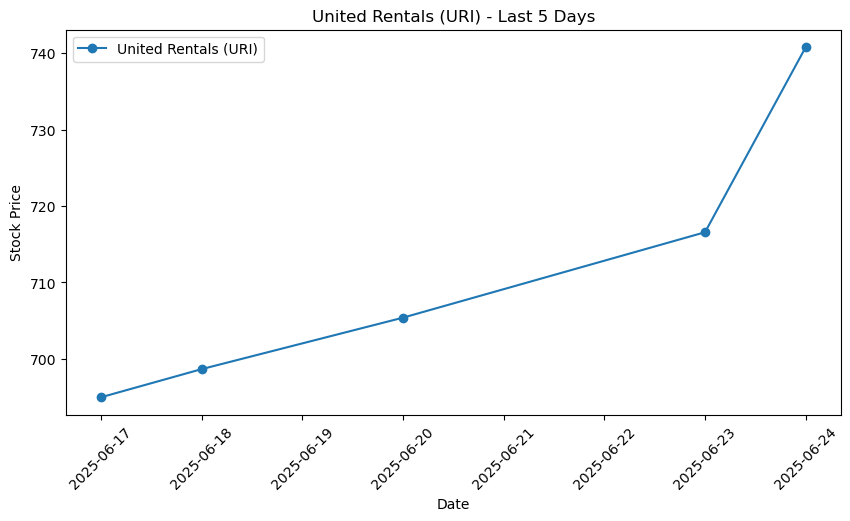

U.S. Bancorp (USB)


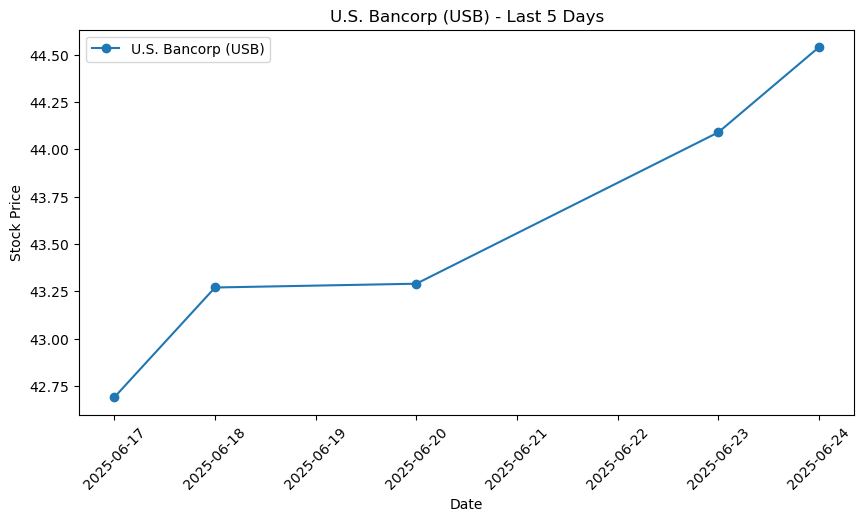

Western Digital (WDC)


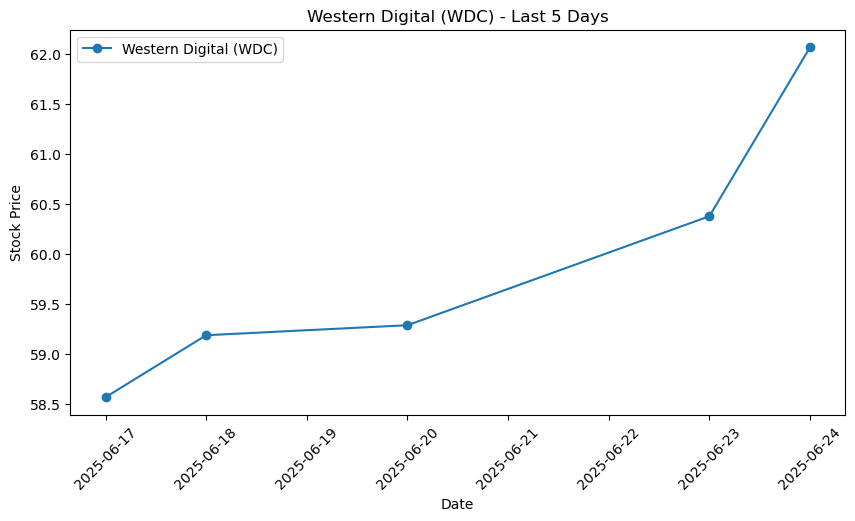

Wells Fargo (WFC)


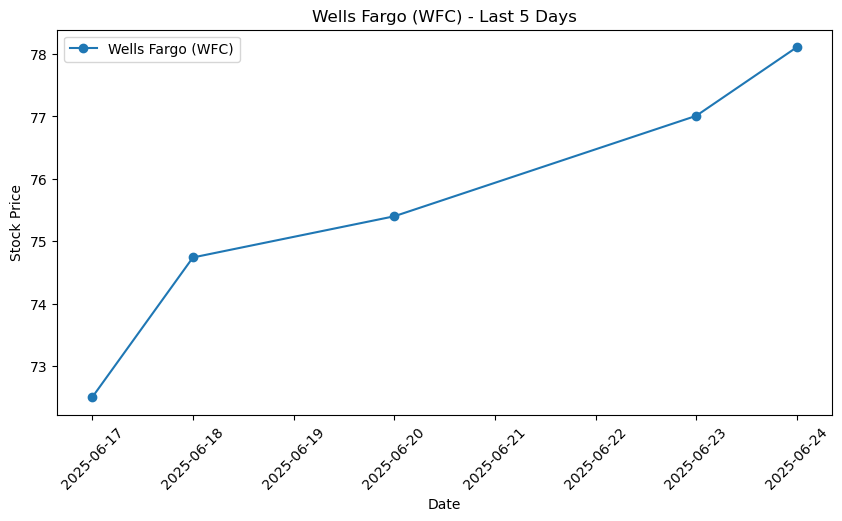

Walmart (WMT)


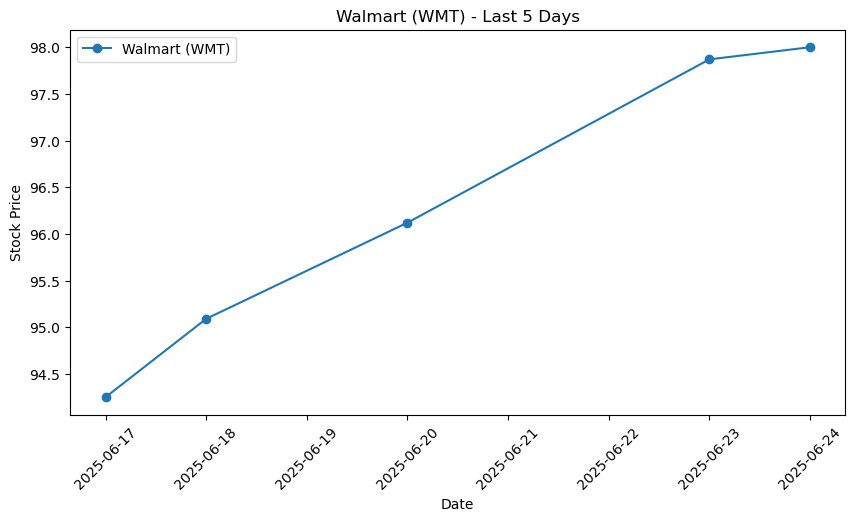

Weyerhaeuser (WY)


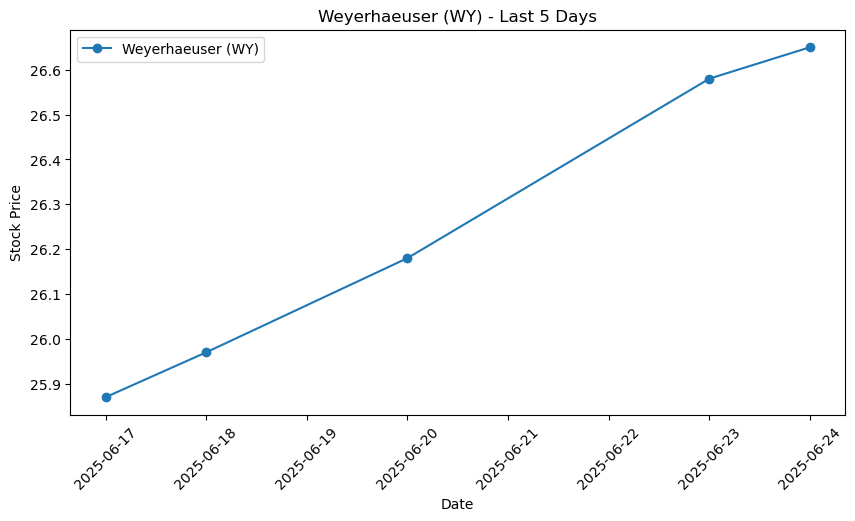

Xcel Energy (XEL)


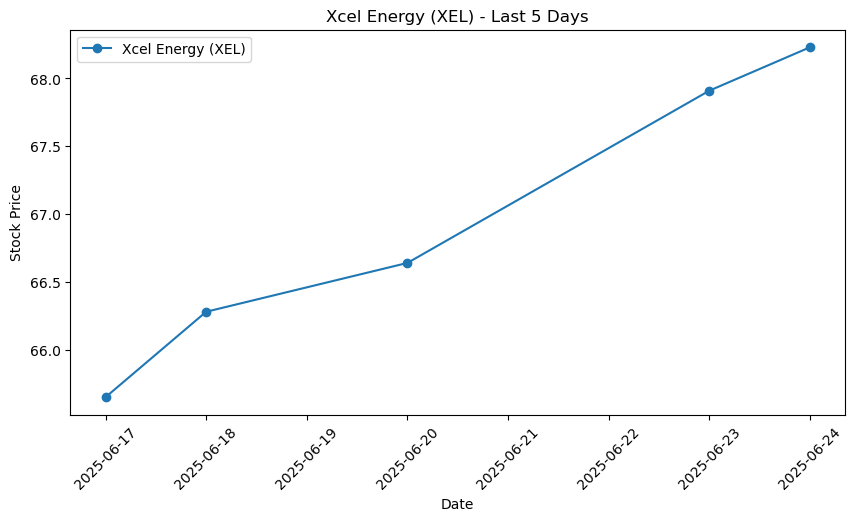

Zimmer Biomet (ZBH)


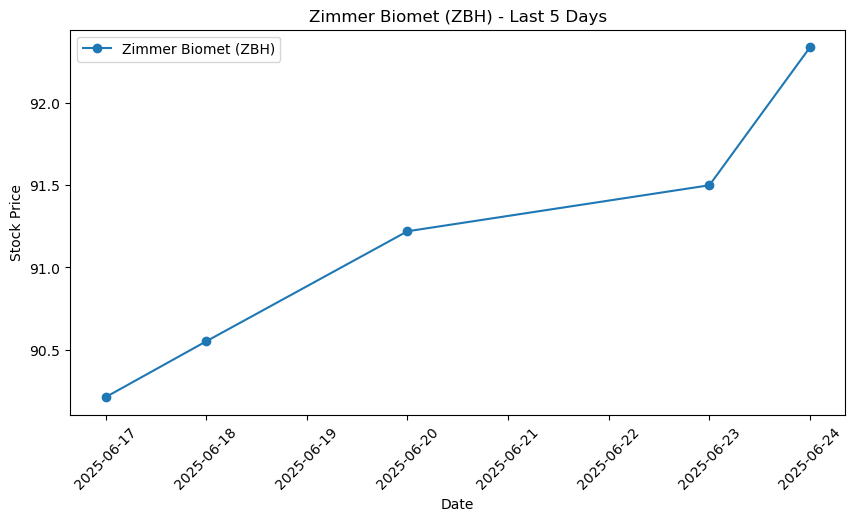

Zebra Technologies (ZBRA)


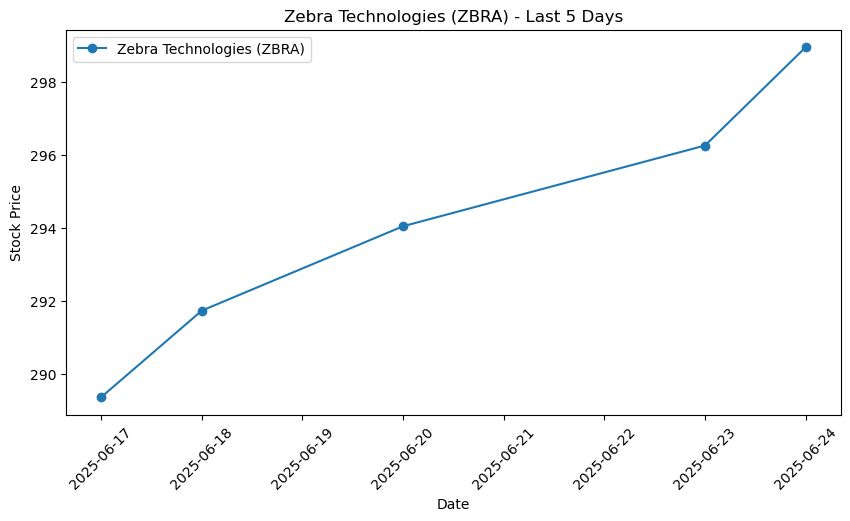

In [21]:
import matplotlib.pyplot as plt

# Get the company names corresponding to the tickers
company_names = dict(zip(sp500_df['Symbol'], sp500_df['Security']))

# Initialize a list to store the tickers and their corresponding company names
increased_stocks_info = []

# Iterate over all the tickers and check if the stock has increased every day in the last 5 days
for ticker in snp_prices_close.columns:
    # Get the stock data for the last 5 days
    stock_data = snp_prices_close[ticker].tail(5)  # Get the last 5 days of data
    
    # Check if the stock has increased every day for the last 5 days
    if all(stock_data[i] < stock_data[i+1] for i in range(len(stock_data)-1)):
        company_name = company_names.get(ticker, "Unknown Company")
        increased_stocks_info.append((company_name, ticker))

# Display the list of companies that increased every day in the last 5 days
print("Stocks that increased every day in the last 5 days:")
for company_name, ticker in increased_stocks_info:
    print(f"{company_name} ({ticker})")

    # Plotting the graph for the stock
    stock_data = snp_prices_close[ticker].tail(5)  # Get the last 5 days of stock data
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data.values, label=f'{company_name} ({ticker})', marker='o')
    plt.title(f'{company_name} ({ticker}) - Last 5 Days')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


[*********************100%***********************]  3 of 3 completed


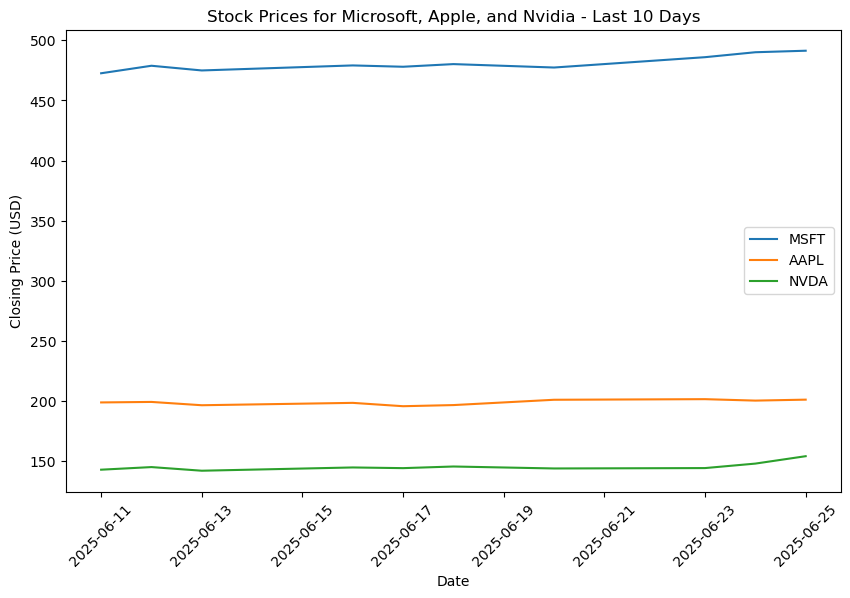

Ticker            AAPL        MSFT        NVDA
Date                                          
2025-06-11  198.779999  472.619995  142.830002
2025-06-12  199.199997  478.869995  145.000000
2025-06-13  196.449997  474.959991  141.970001
2025-06-16  198.419998  479.140015  144.690002
2025-06-17  195.639999  478.040009  144.119995
2025-06-18  196.580002  480.239990  145.479996
2025-06-20  201.000000  477.399994  143.850006
2025-06-23  201.500000  486.000000  144.169998
2025-06-24  200.300003  490.109985  147.899994
2025-06-25  201.100006  491.371704  154.054993


In [22]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers for Microsoft, Apple, and Nvidia
our_stocks = ['MSFT', 'AAPL', 'NVDA']

# Download stock data for the last 10 days
stock_data = yf.download(our_stocks, period='10d')['Close']

# Plot the closing prices for the last 10 days for each stock
plt.figure(figsize=(10, 6))

for stock in our_stocks:
    plt.plot(stock_data.index, stock_data[stock], label=stock)

plt.title('Stock Prices for Microsoft, Apple, and Nvidia - Last 10 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Optionally, print the data for the last 10 days
print(stock_data)
